In [1]:
import numpy as np
import pandas as pd
import arviz as az
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm
import sys
import os
import pickle

# DQN

## Mental

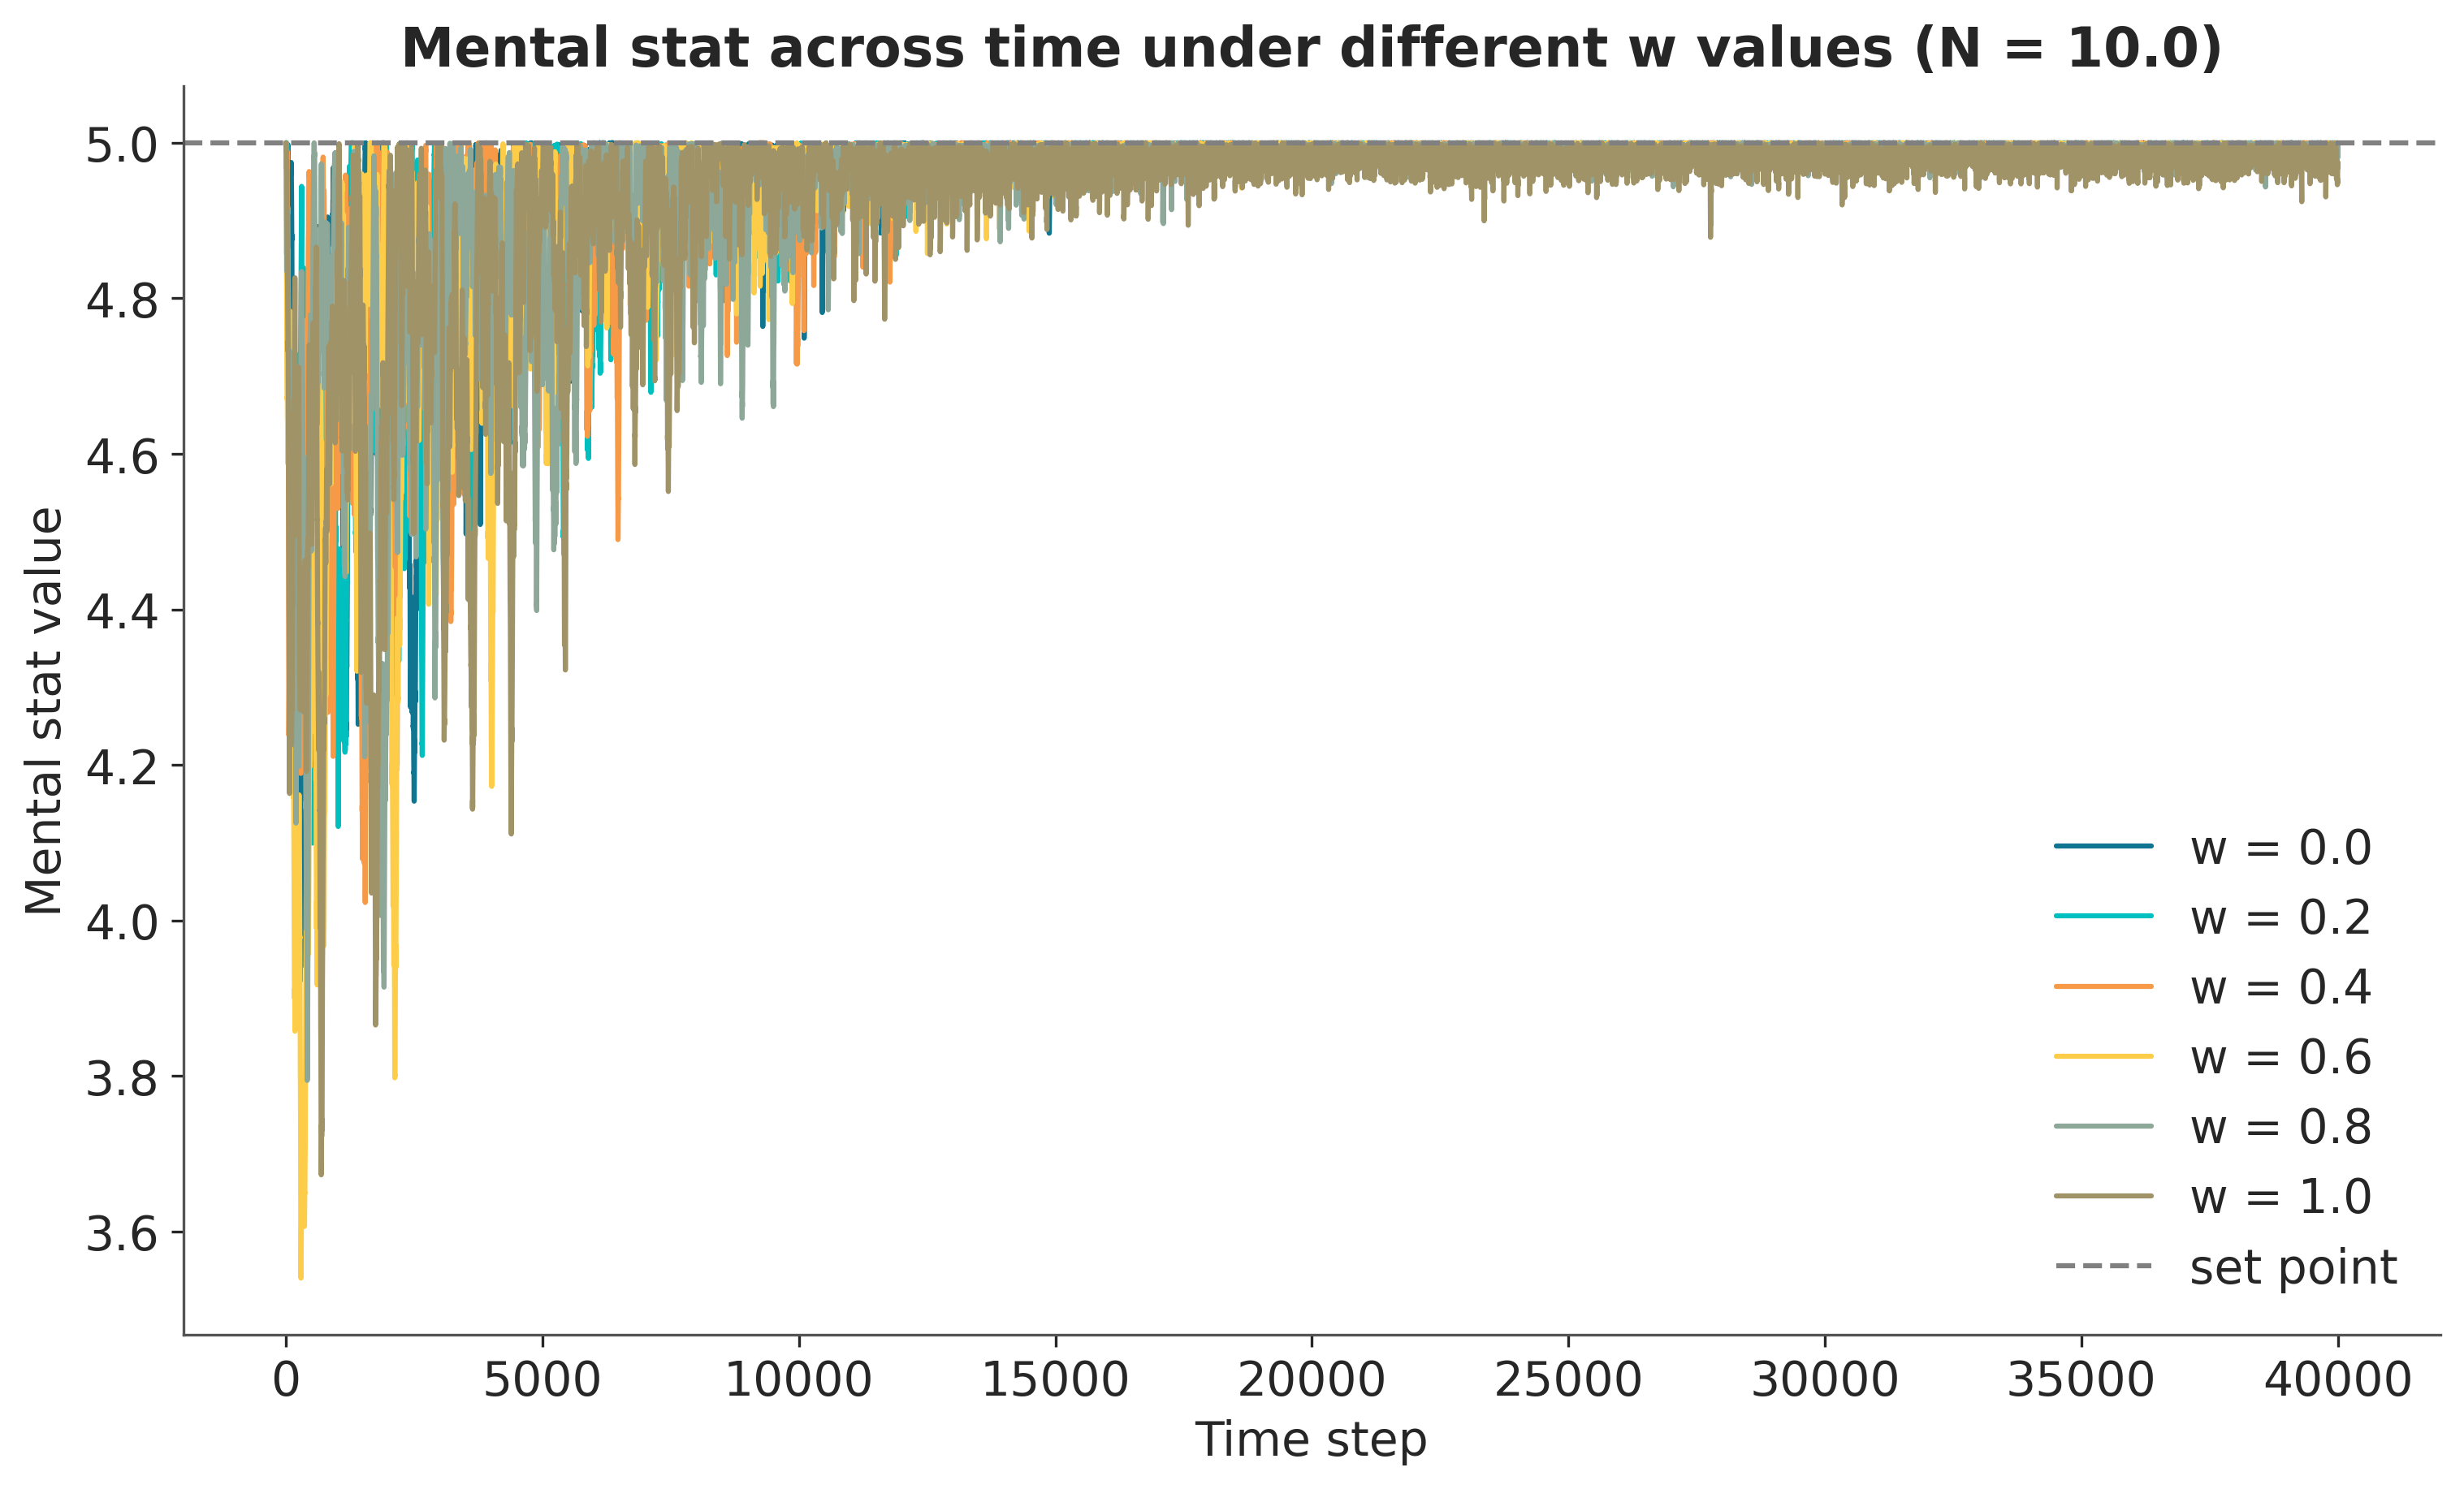

In [6]:
az.style.use("arviz-doc")
plt.figure(figsize=(10, 6))

w_list = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
num = 0
for w in w_list:
    mental = []
    for batch in range(10):
        num += 1
        with open(f'../RL/outputs/dqn/mod_mental_5e-05_w{w}_pain3_{batch}.pkl', 'rb') as file:
            mental_list = np.array(pickle.load(file)).reshape(-1)
        mental.append(mental_list)
    mental = np.array(mental) # shape: (10, 15000)
    avg_mental = np.mean(mental, axis=0)
    plt.plot(avg_mental, label=f'w = {w}')

plt.axhline(y=5, color='grey', linestyle='--', label='set point')
plt.xlabel('Time step')
plt.ylabel('Mental stat value')
plt.title(f'Mental stat across time under different w values (N = {num/len(w_list)})')
plt.legend(loc='best')
plt.show()

## Stat

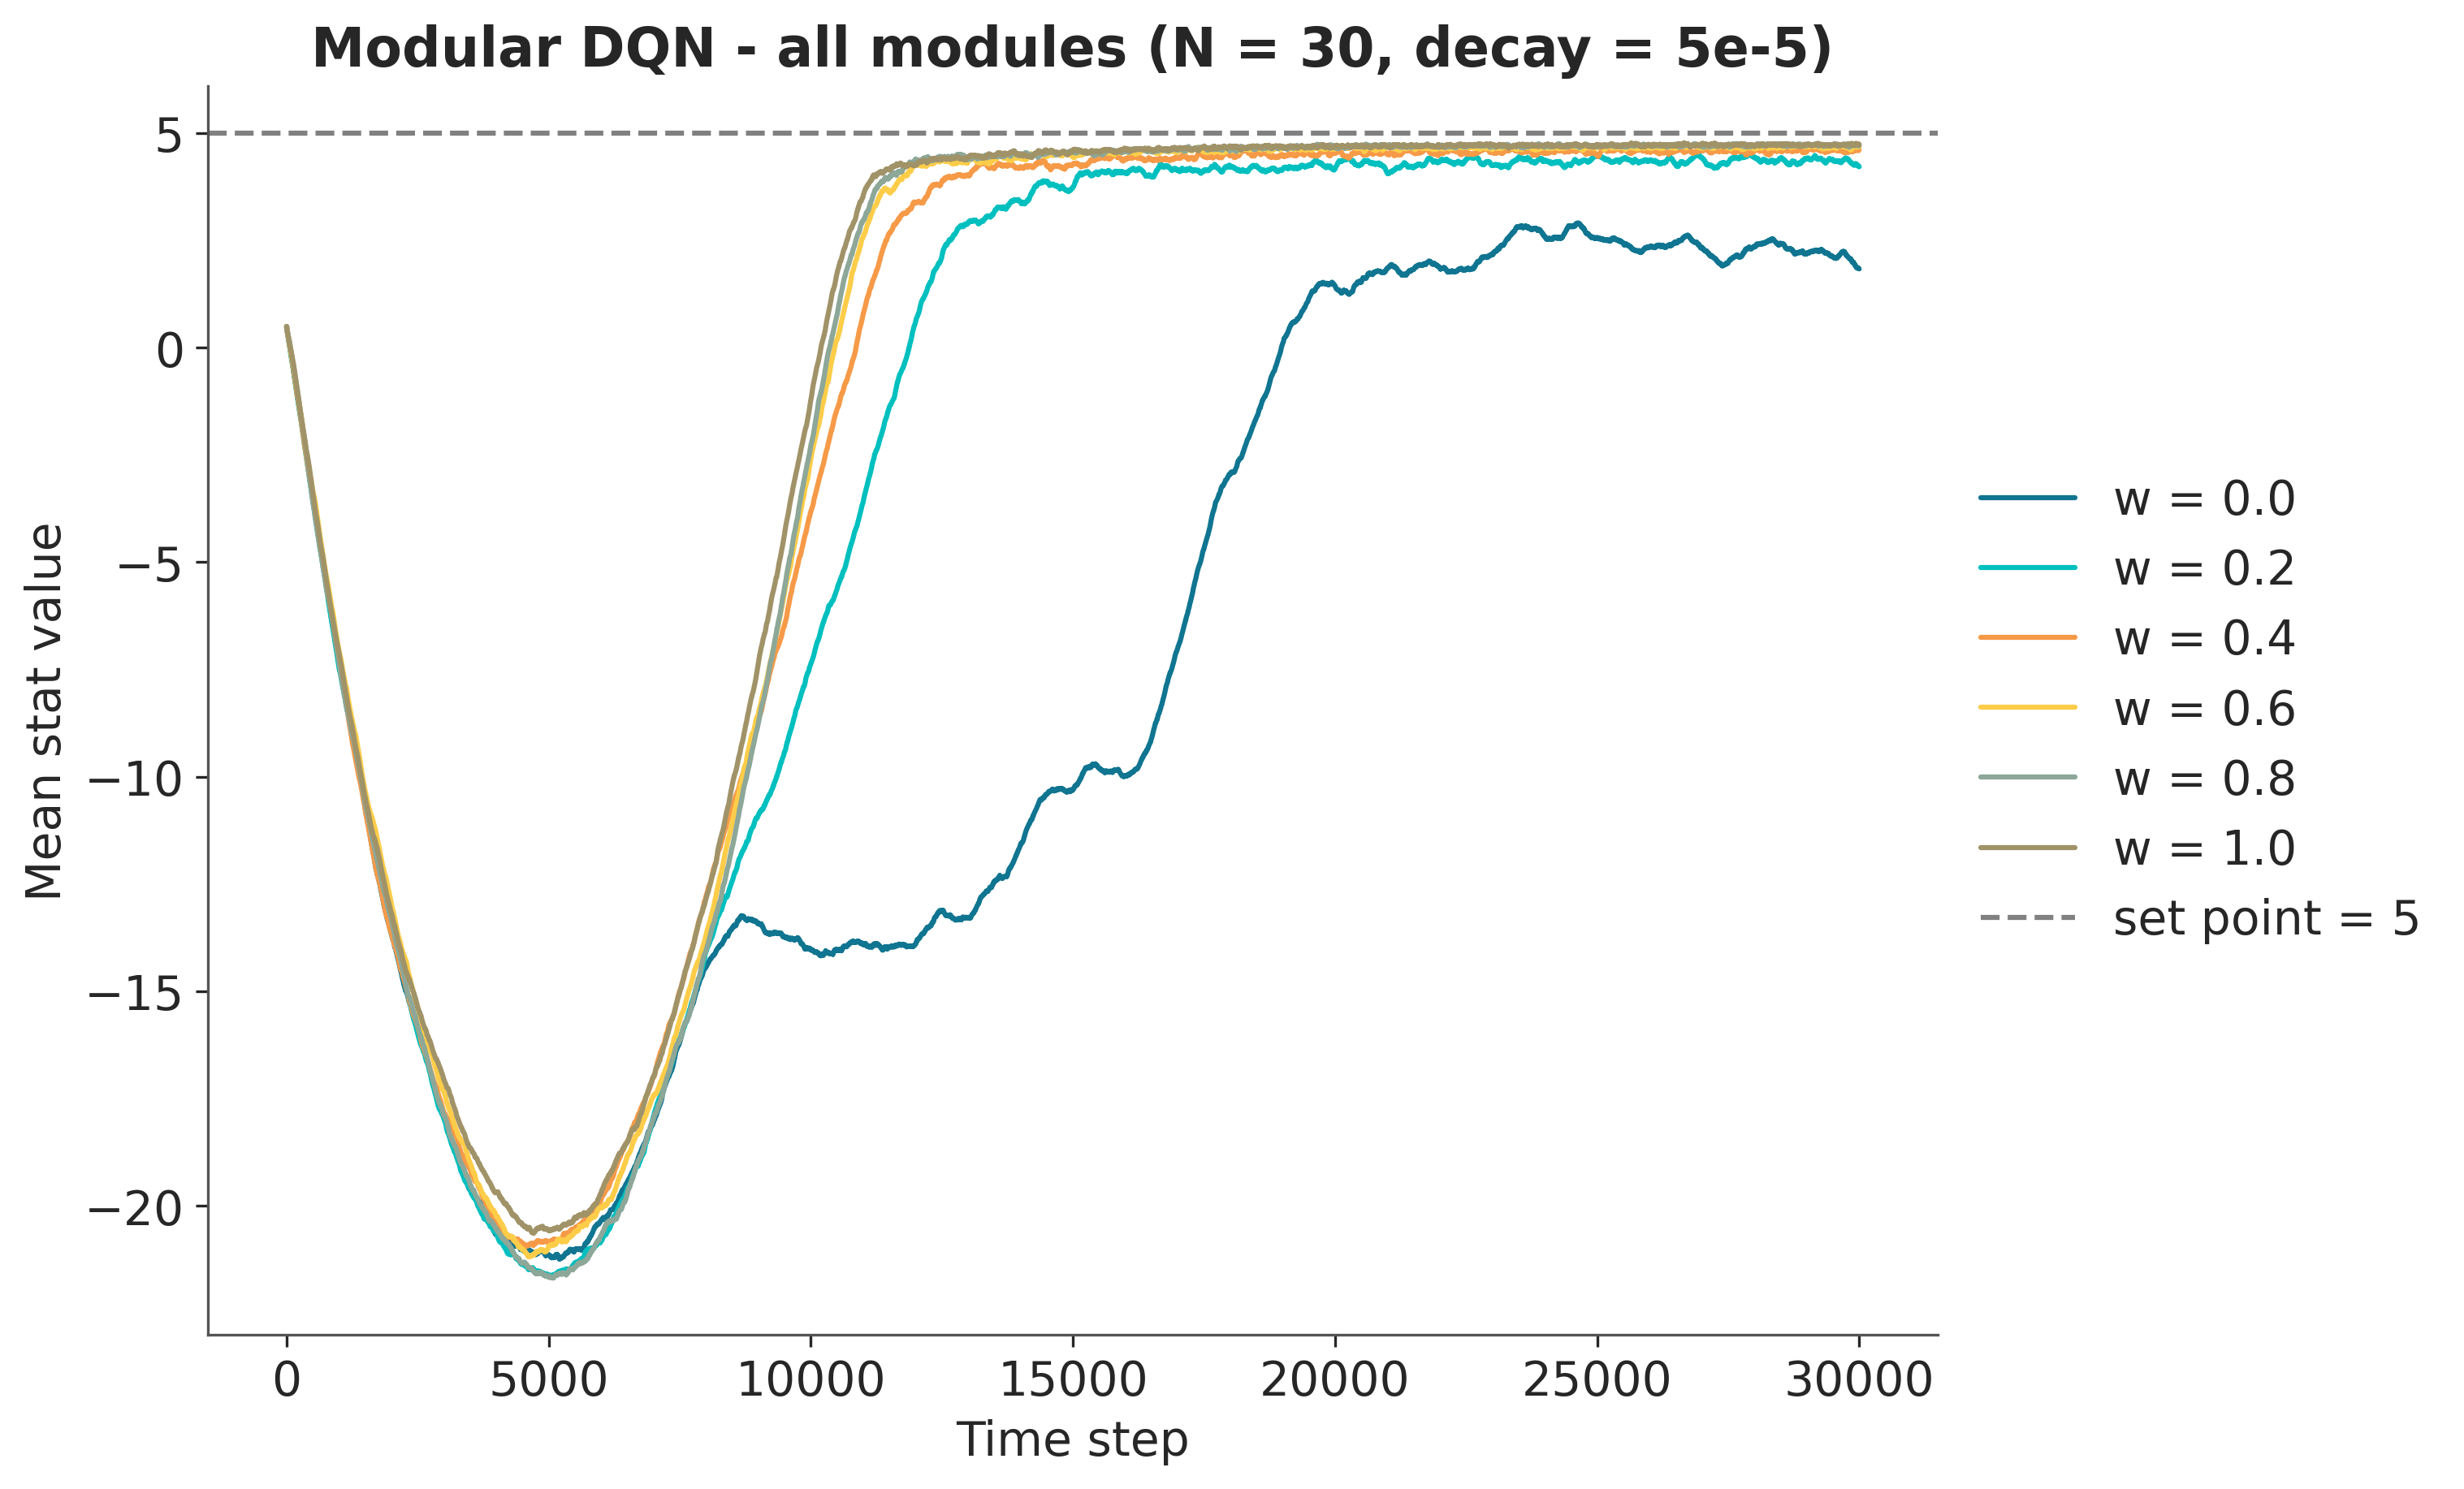

In [81]:
az.style.use("arviz-doc")
plt.figure(figsize=(10, 6))

#w_list = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
my_list = ['5e']
for w in w_list:
    stats = []
    for batch in range(30):
        with open(f'../RL/outputs/mod_homeo/mod_stat_5e-05_w1_{batch}.pkl', 'rb') as file:
            stats_list = np.array(pickle.load(file))
        stats.append(stats_list)
    stats = np.array(stats) # shape: (50, 30000, 4)
    avg_stats = np.mean(stats, axis=0)
    avg_stats = np.mean(avg_stats, axis=1)
    plt.plot(avg_stats, label=f'w = {w}')

plt.axhline(y=5, color='grey', linestyle='--', label='set point = 5')
plt.xlabel('Time step')
plt.ylabel('Mean stat value')
plt.title('Modular DQN - all modules (N = 30, decay = 5e-5)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

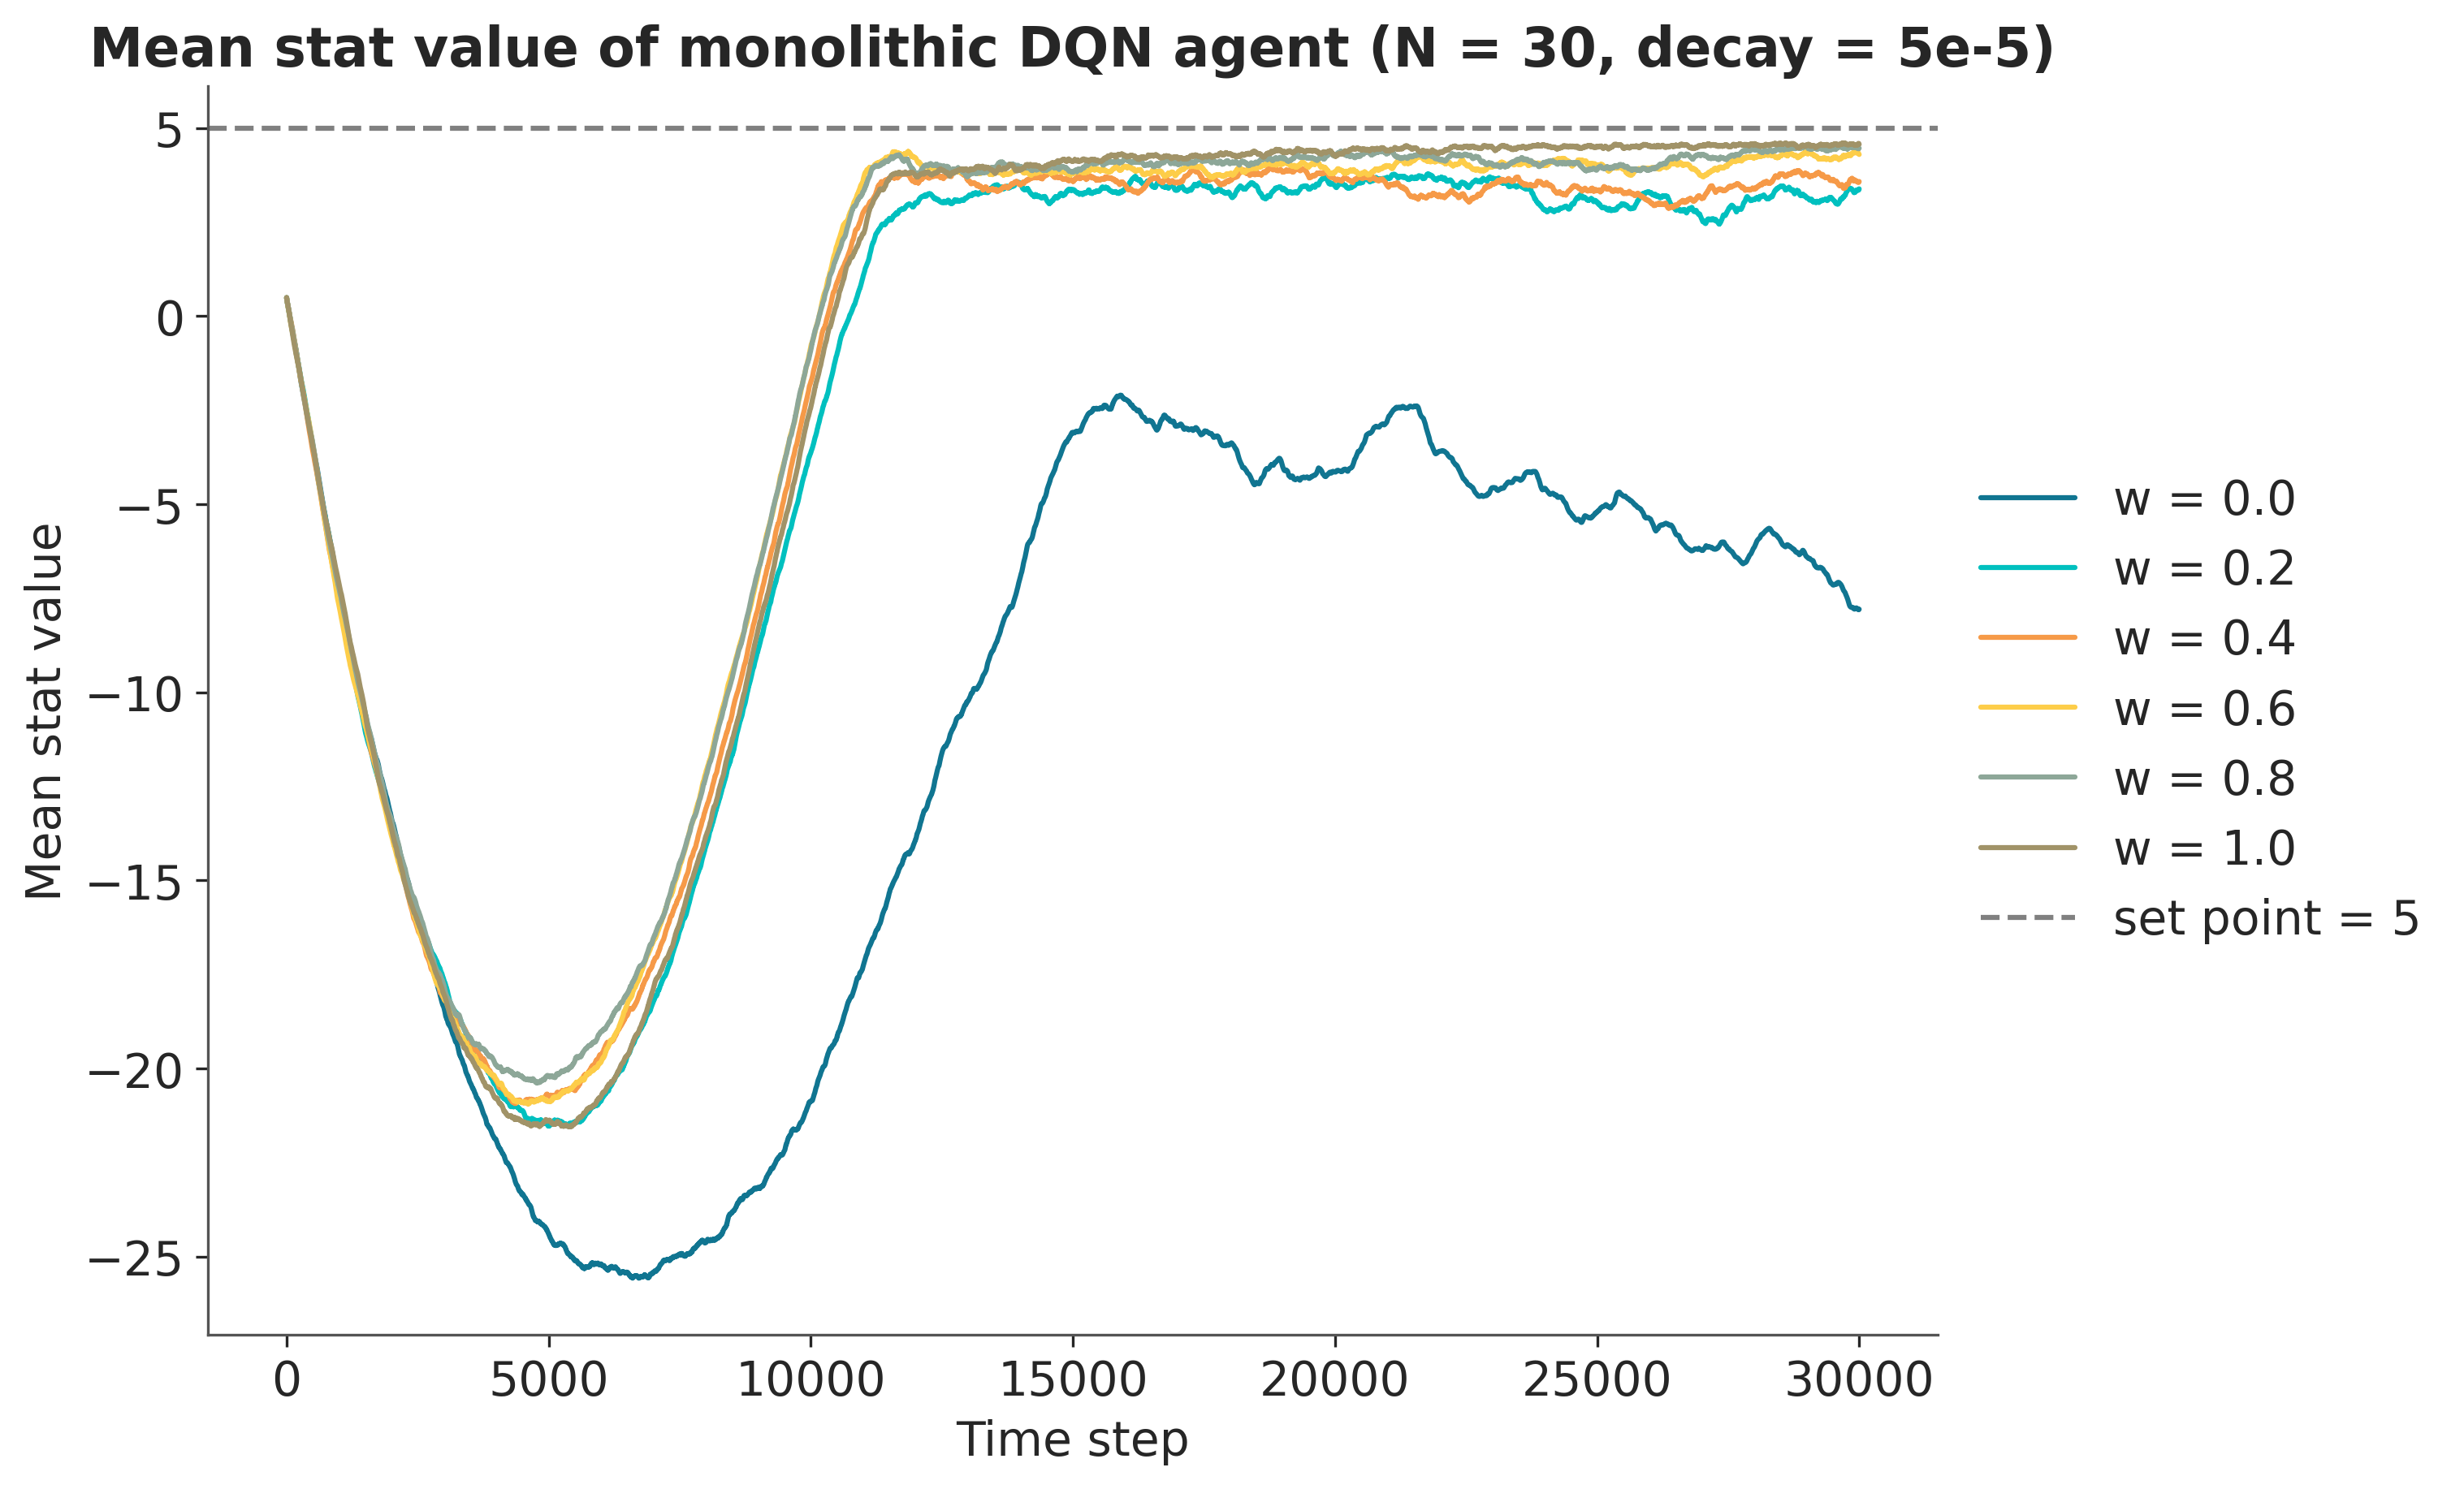

In [21]:
az.style.use("arviz-doc")
plt.figure(figsize=(10, 6))
size = 30

w_list = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
for w in w_list:
    stats = []
    for batch in range(size):
        with open(f'../RL/outputs/mon/mono_stat_5e-05_w{w}_{batch}.pkl', 'rb') as file:
            stats_list = np.array(pickle.load(file))
        stats.append(stats_list)
    stats = np.array(stats) # shape: (50, 30000, 4)
    avg_stats = np.mean(stats, axis=0)
    avg_stats = np.mean(avg_stats, axis=1)
    plt.plot(avg_stats, label=f'w = {w}')

plt.axhline(y=5, color='grey', linestyle='--', label='set point = 5')
plt.xlabel('Time step')
plt.ylabel('Mean stat value')
plt.title(f'Mean stat value of monolithic DQN agent (N = {size}, decay = 5e-5)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Bar plot

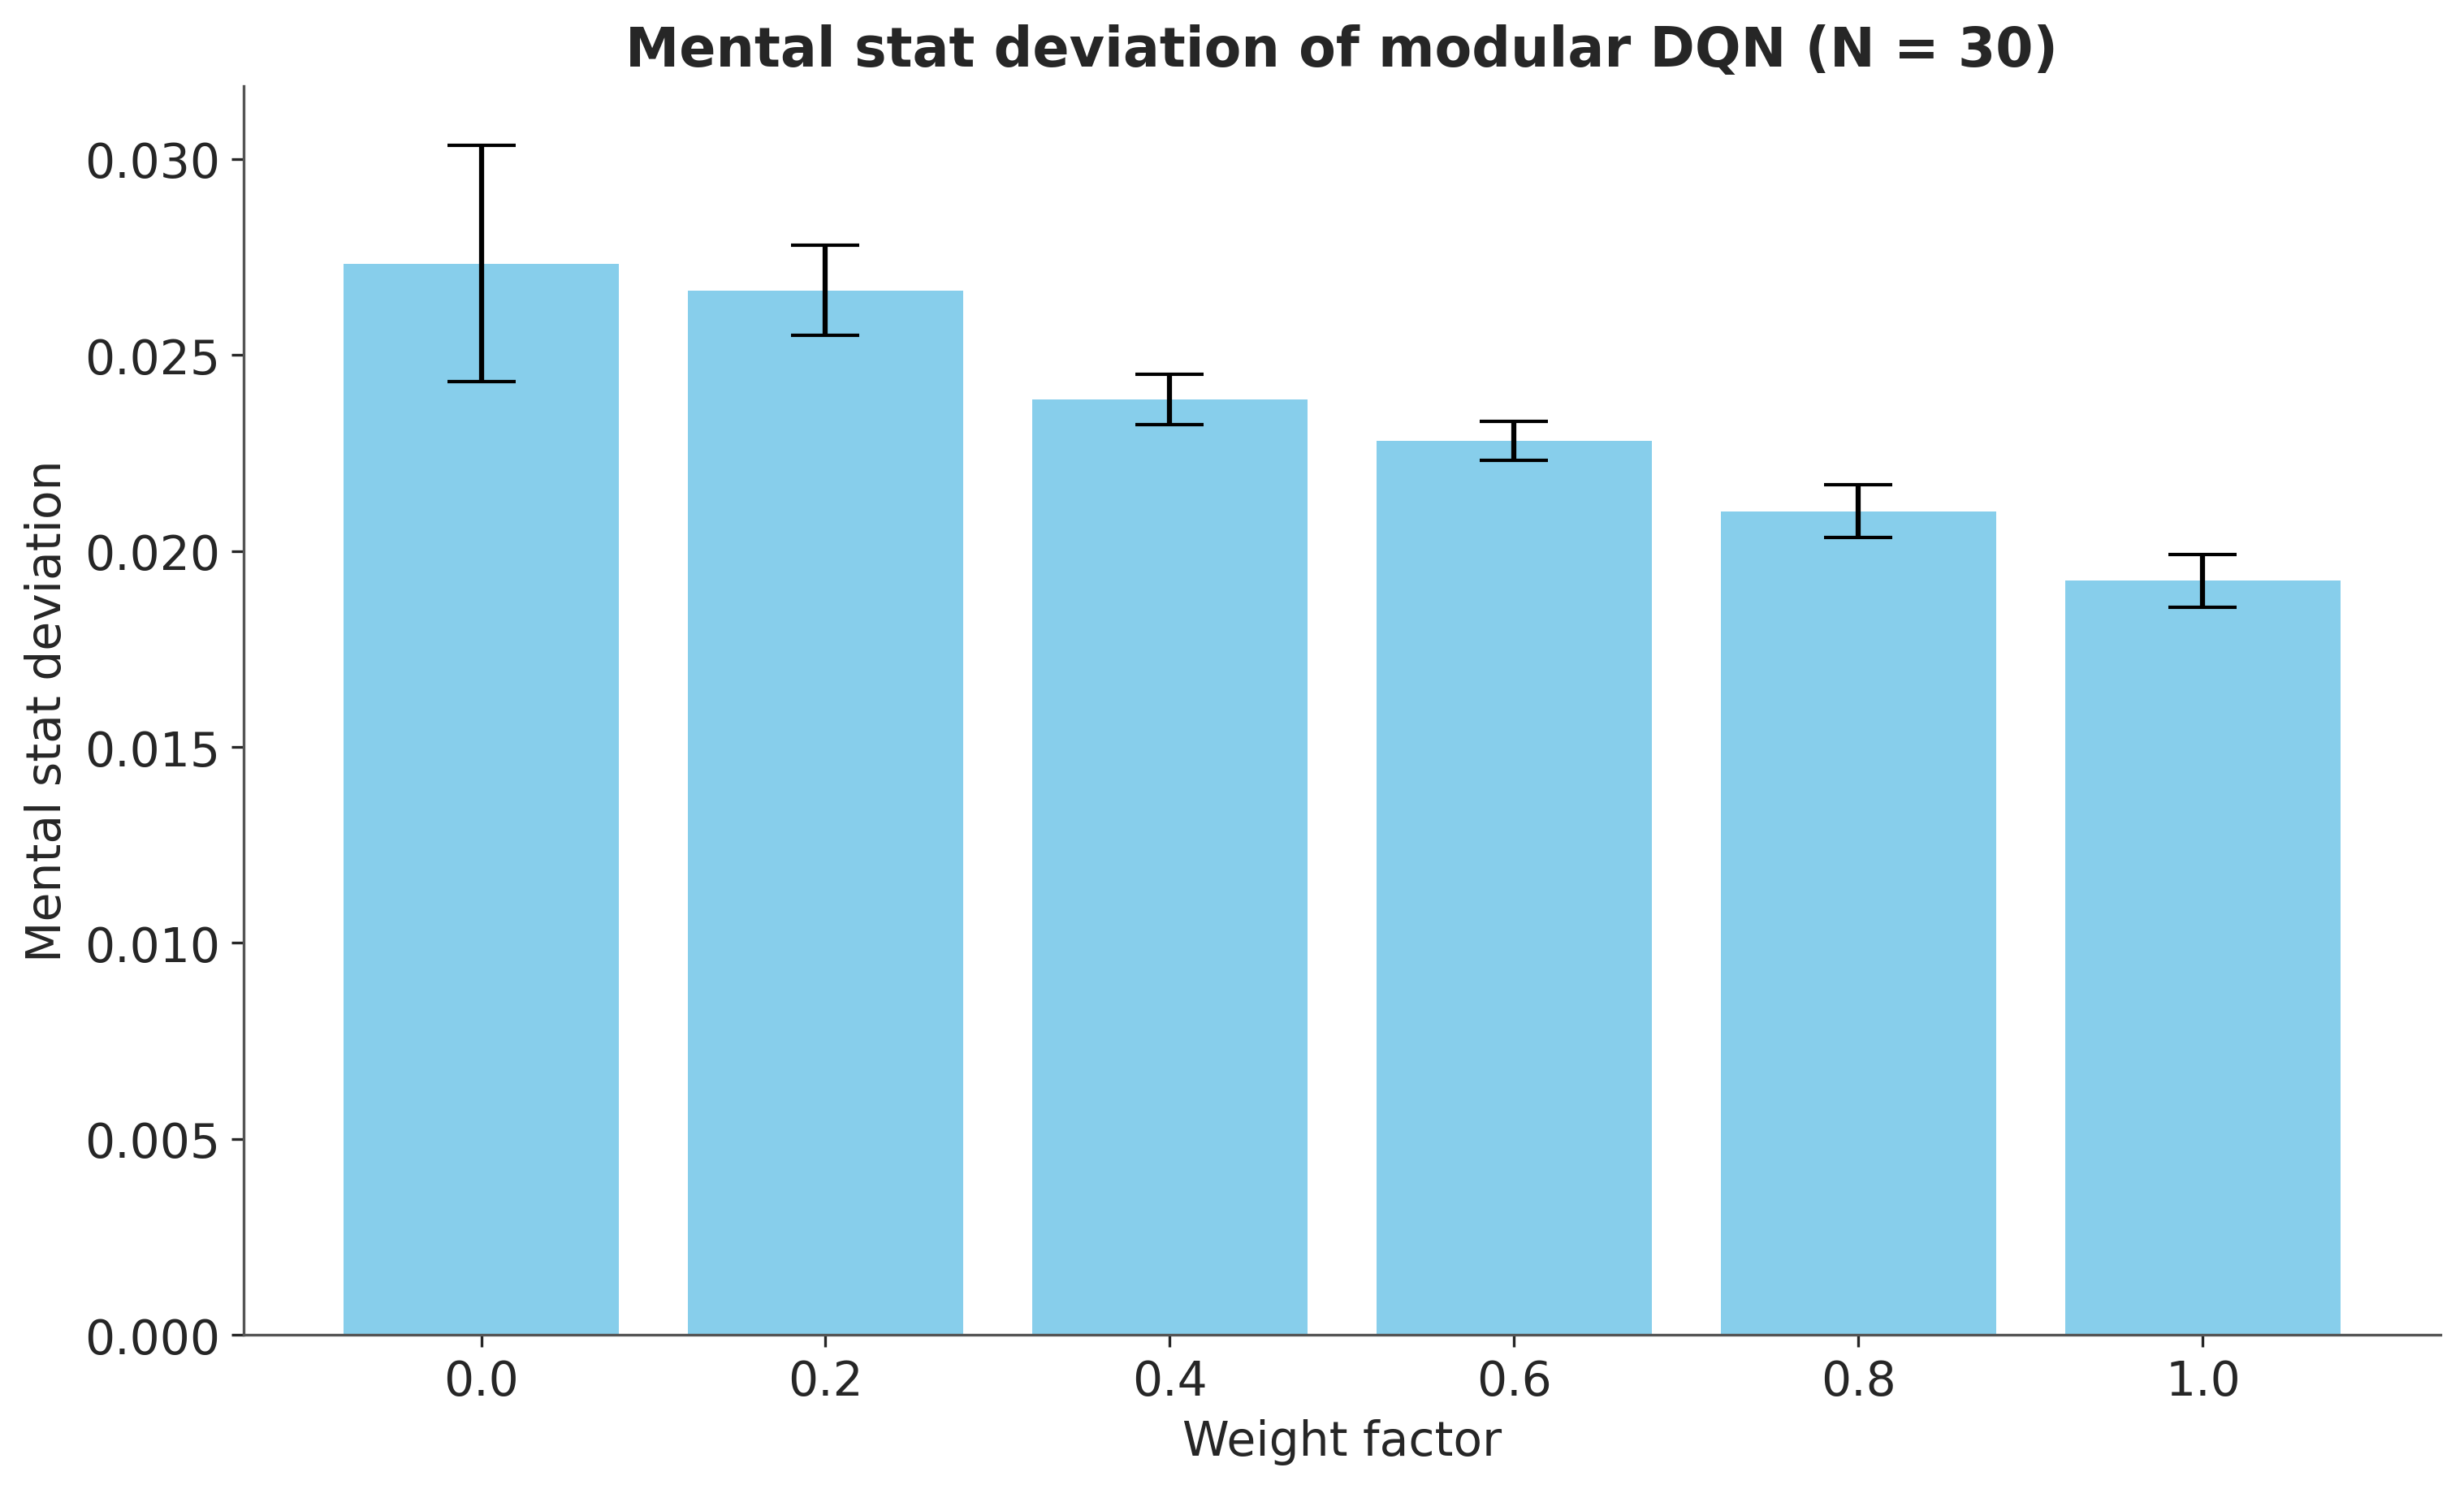

In [82]:
# Mental
size = 30
w_list = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
x_positions = range(len(w_list))
plt.figure(figsize=(10, 6))

for i in x_positions:
    deviation_list = []
    for batch in range(size):
        with open(f'../RL/outputs/mod_homeo/mod_mental_deviation_5e-05_w{w_list[i]}_{batch}.pkl', 'rb') as file:
            mental_deviation = pickle.load(file)
            deviation_list.append(mental_deviation)
    avg = np.mean(deviation_list)
    std = np.std(deviation_list, ddof=1)
    sem = std / np.sqrt(len(deviation_list))
    plt.bar(i, avg, yerr=sem, capsize=10, color='skyblue')

# Set x-ticks and labels after the loop
plt.xticks(x_positions, [f'{w}' for w in w_list])

plt.xlabel('Weight factor')
plt.ylabel('Mental stat deviation')
plt.title(f'Mental stat deviation of modular DQN (N = {size})')

# Show the plot
plt.show()

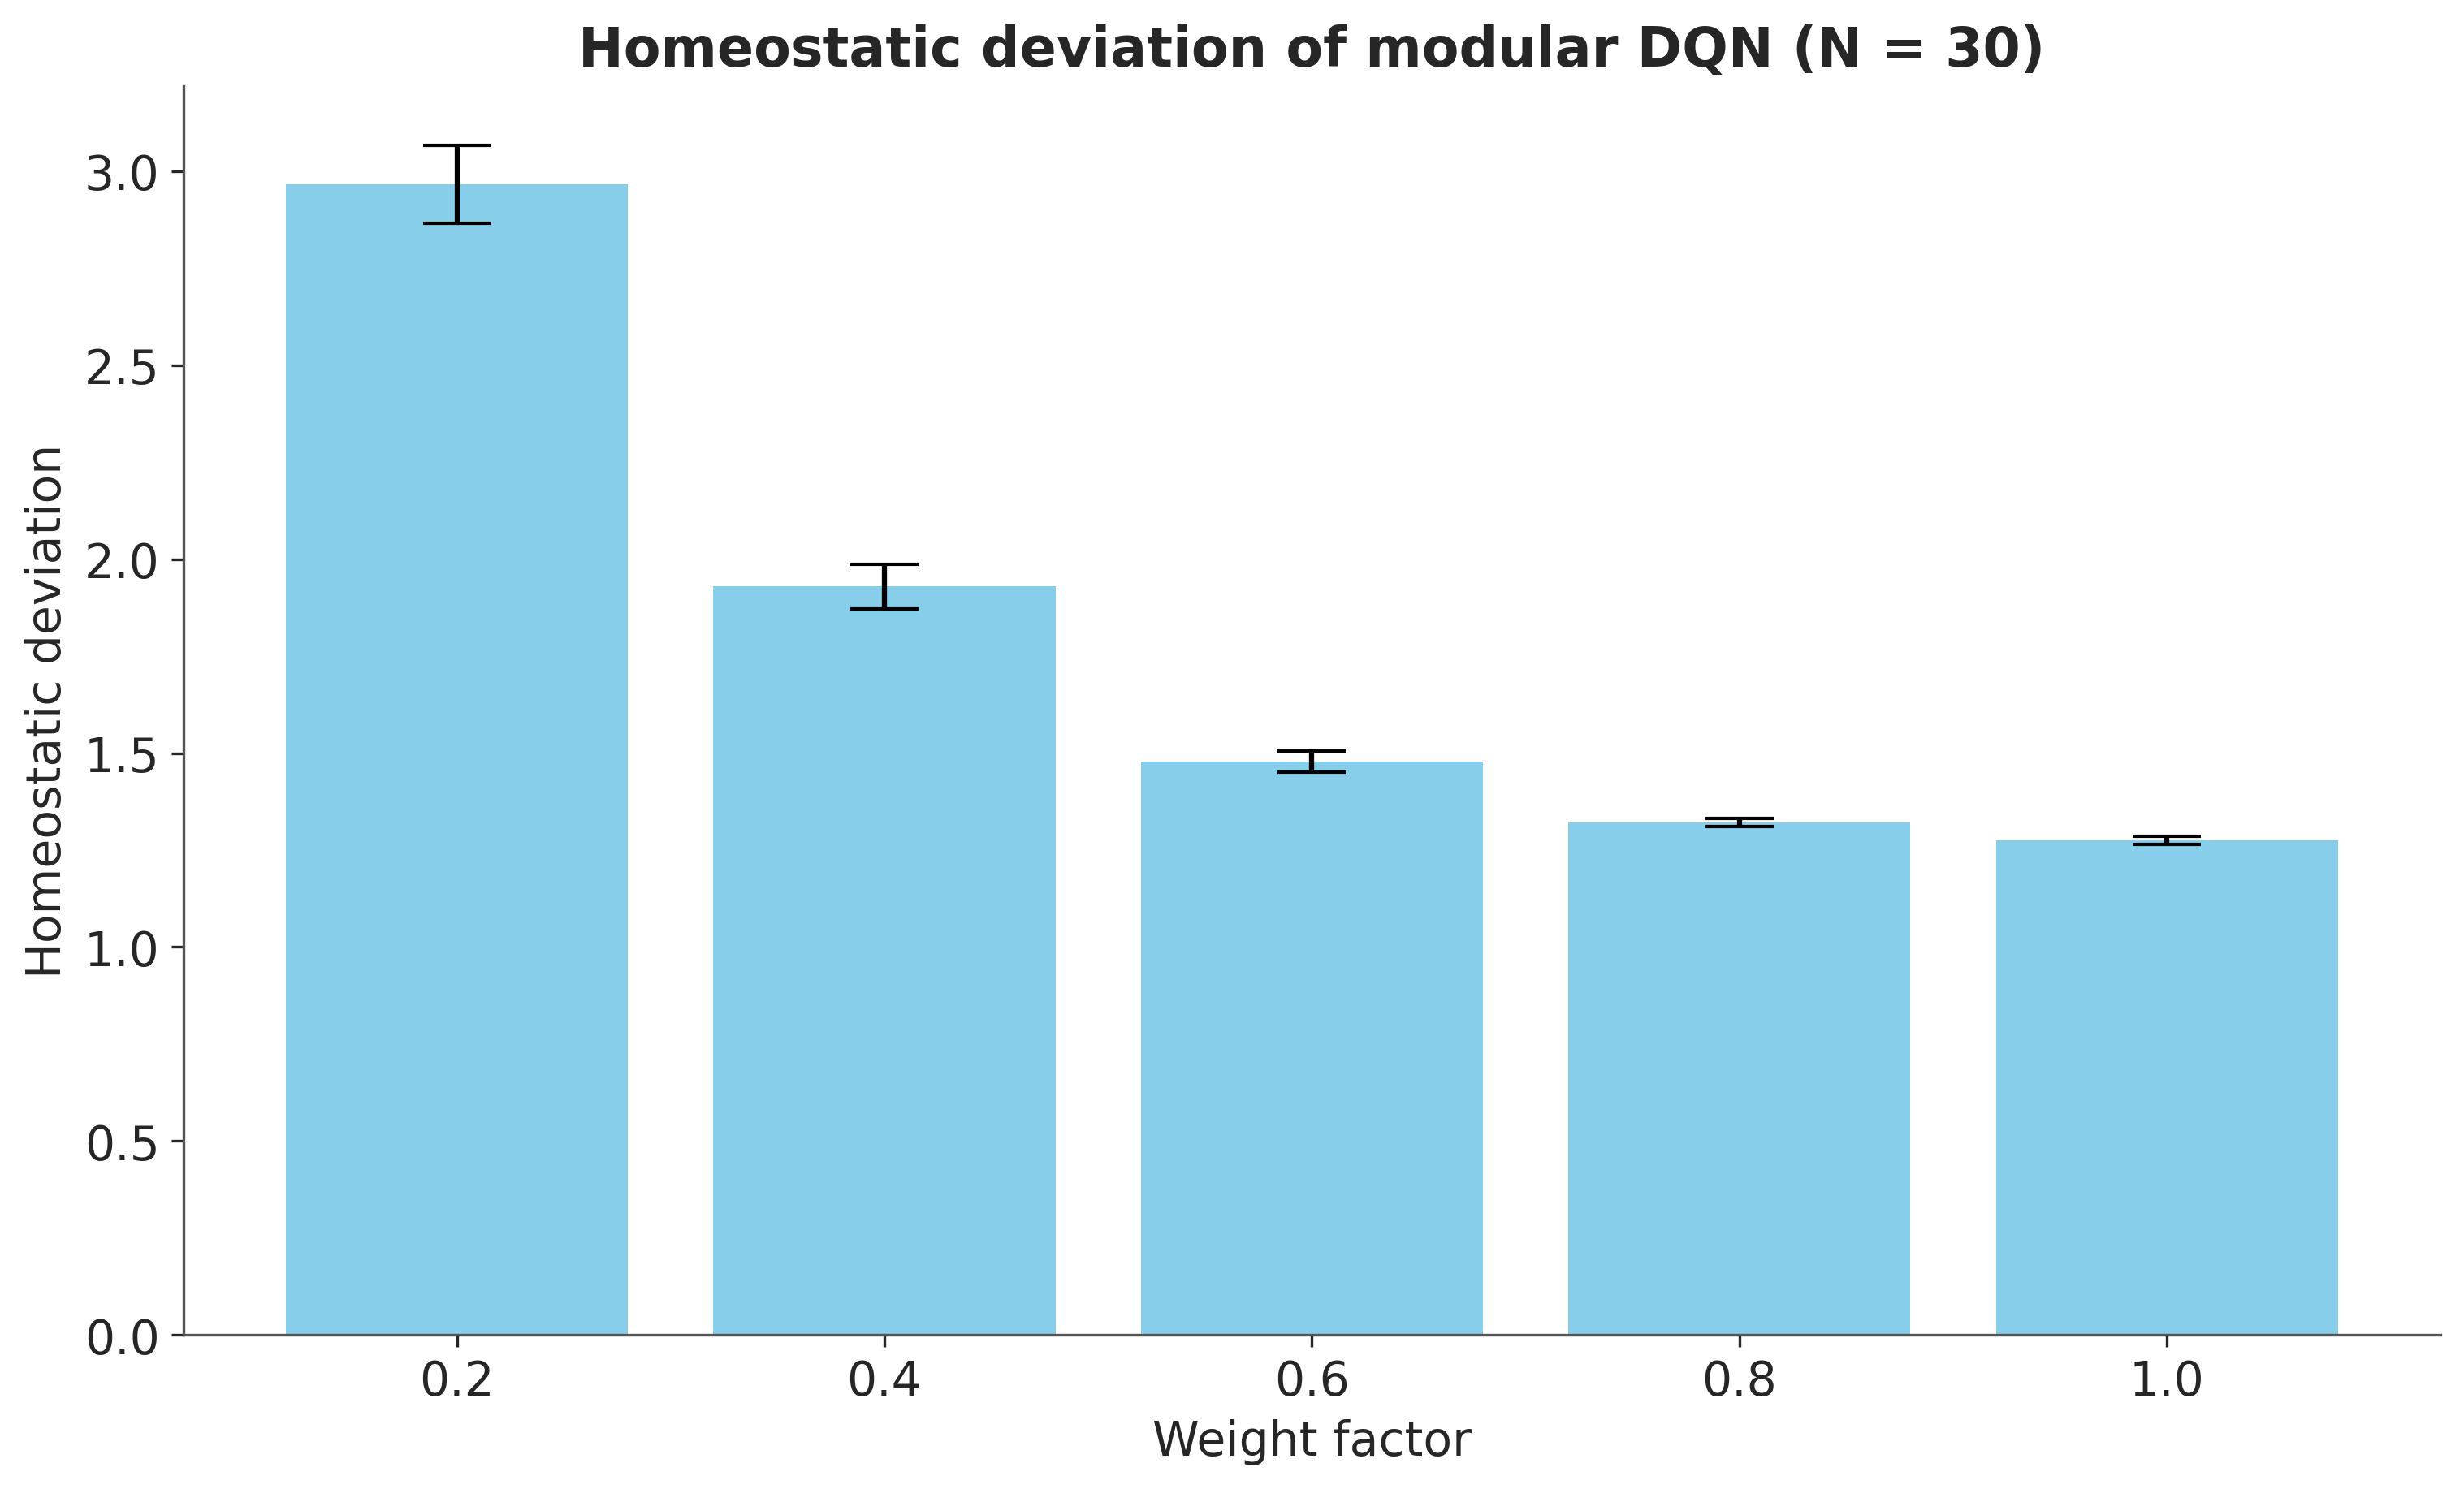

In [86]:
# Stat
size = 30
w_list = [0.2, 0.4, 0.6, 0.8, 1.0]
x_positions = range(len(w_list))

plt.figure(figsize=(10, 6))
for i in x_positions:
    deviation_list = []
    for batch in range(size):
        with open(f'../RL/outputs/mod_homeo/mod_stat_deviation_5e-05_w{w_list[i]}_{batch}.pkl', 'rb') as file:
            deviation = pickle.load(file)
            deviation_list.append(deviation)
    avg = np.mean(deviation_list)
    std = np.std(deviation_list, ddof=1)
    sem = std / np.sqrt(len(deviation_list))
    plt.bar(i, avg, yerr=sem, capsize=10, color='skyblue')

# Set x-ticks and labels after the loop
plt.xticks(x_positions, [f'{w}' for w in w_list])

plt.xlabel('Weight factor')
plt.ylabel('Homeostatic deviation')
plt.title(f'Homeostatic deviation of modular DQN (N = {size})')

# Show the plot
plt.show()

## Avoidance

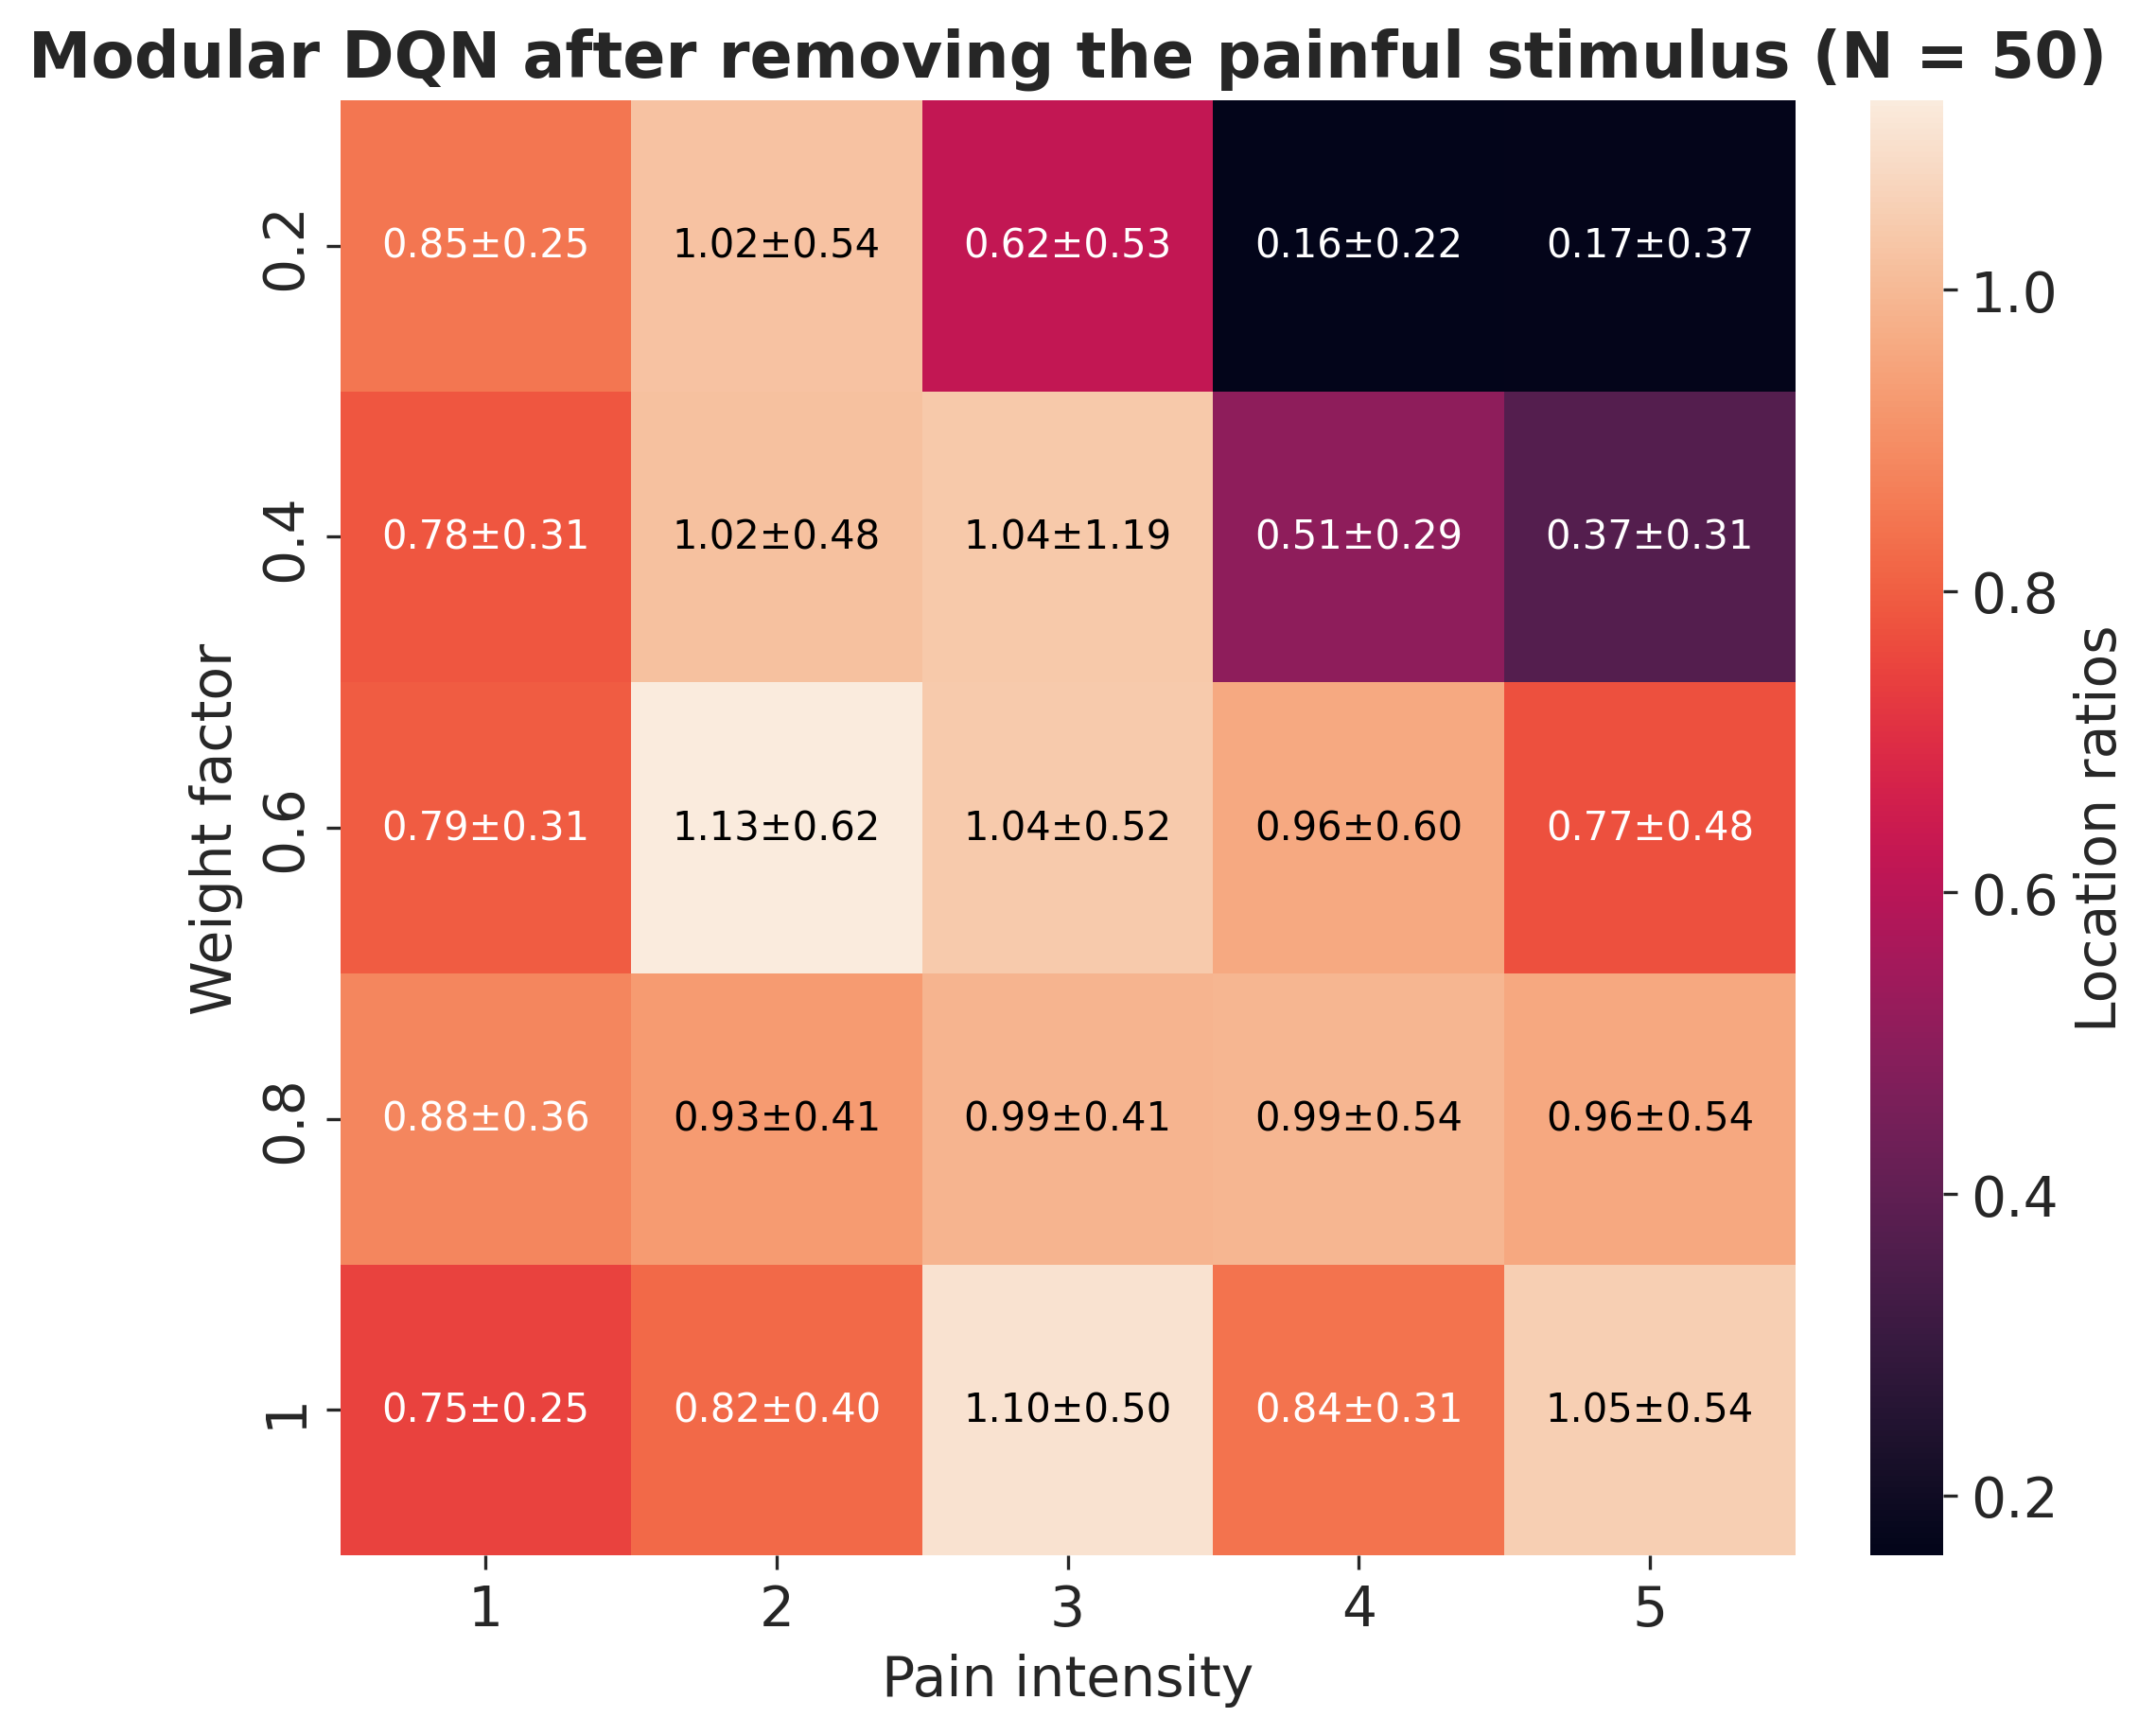

In [21]:
az.style.use("arviz-doc")
matrix = np.full((5, 5), np.nan, dtype=object)
w_list = [0.2, 0.4, 0.6, 0.8, 1.0]
pain_list = [1, 2, 3, 4, 5]
size = 50
plt.figure(figsize=(7, 6))

for j in range(len(pain_list)):
    for i in range(len(w_list)):
        ratio_list = []
        for batch in range(size):
            num_1 = 0
            num_2 = 0
            with open(f'../RL/outputs/dqn/mod_location_5e-05_w{w_list[i]}_pain{pain_list[j]}_{batch}.pkl', 'rb') as file:
                location = np.array(pickle.load(file))[30000:35000]
                for loc in location:
                    if loc[0] in (4, 5) and loc[1] in (5, 6, 7, 8):
                        num_1 += 1
                    if loc[0] in (4, 5) and loc[1] in (1, 2, 3, 4):
                        num_2 += 1
            ratio = num_2 / num_1
            ratio_list.append(ratio)
        
        avg = np.mean(ratio_list)
        std_dev = np.std(ratio_list)
        matrix[i, j] = (avg, std_dev)  # Store mean and std as a tuple

# Create a new matrix for the mean values to generate the heatmap
mean_matrix = np.array([[val[0] for val in row] for row in matrix])

# Generate the heatmap using only the mean values
heatmap = sns.heatmap(mean_matrix, annot=None, fmt=".2f", cbar_kws={'label': 'Location ratios'},
                      xticklabels=np.arange(1, 6, 1), yticklabels=[0.2, 0.4, 0.6, 0.8, 1],
                      annot_kws={'fontsize': 10}, square=True)

# Customize the annotations to show mean ± std and set text color based on mean value
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        mean_val = matrix[i, j][0]
        std_val = matrix[i, j][1]
        annotation = f"{mean_val:.2f}±{std_val:.2f}"
        
        # Set text color based on mean value
        text_color = "white" if mean_val < 0.9 else "black"
        
        heatmap.text(j + 0.5, i + 0.5, annotation,
                     ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel('Pain intensity')
plt.ylabel('Weight factor')
plt.title(f'Modular DQN after removing the painful stimulus (N = 50)')
plt.show()

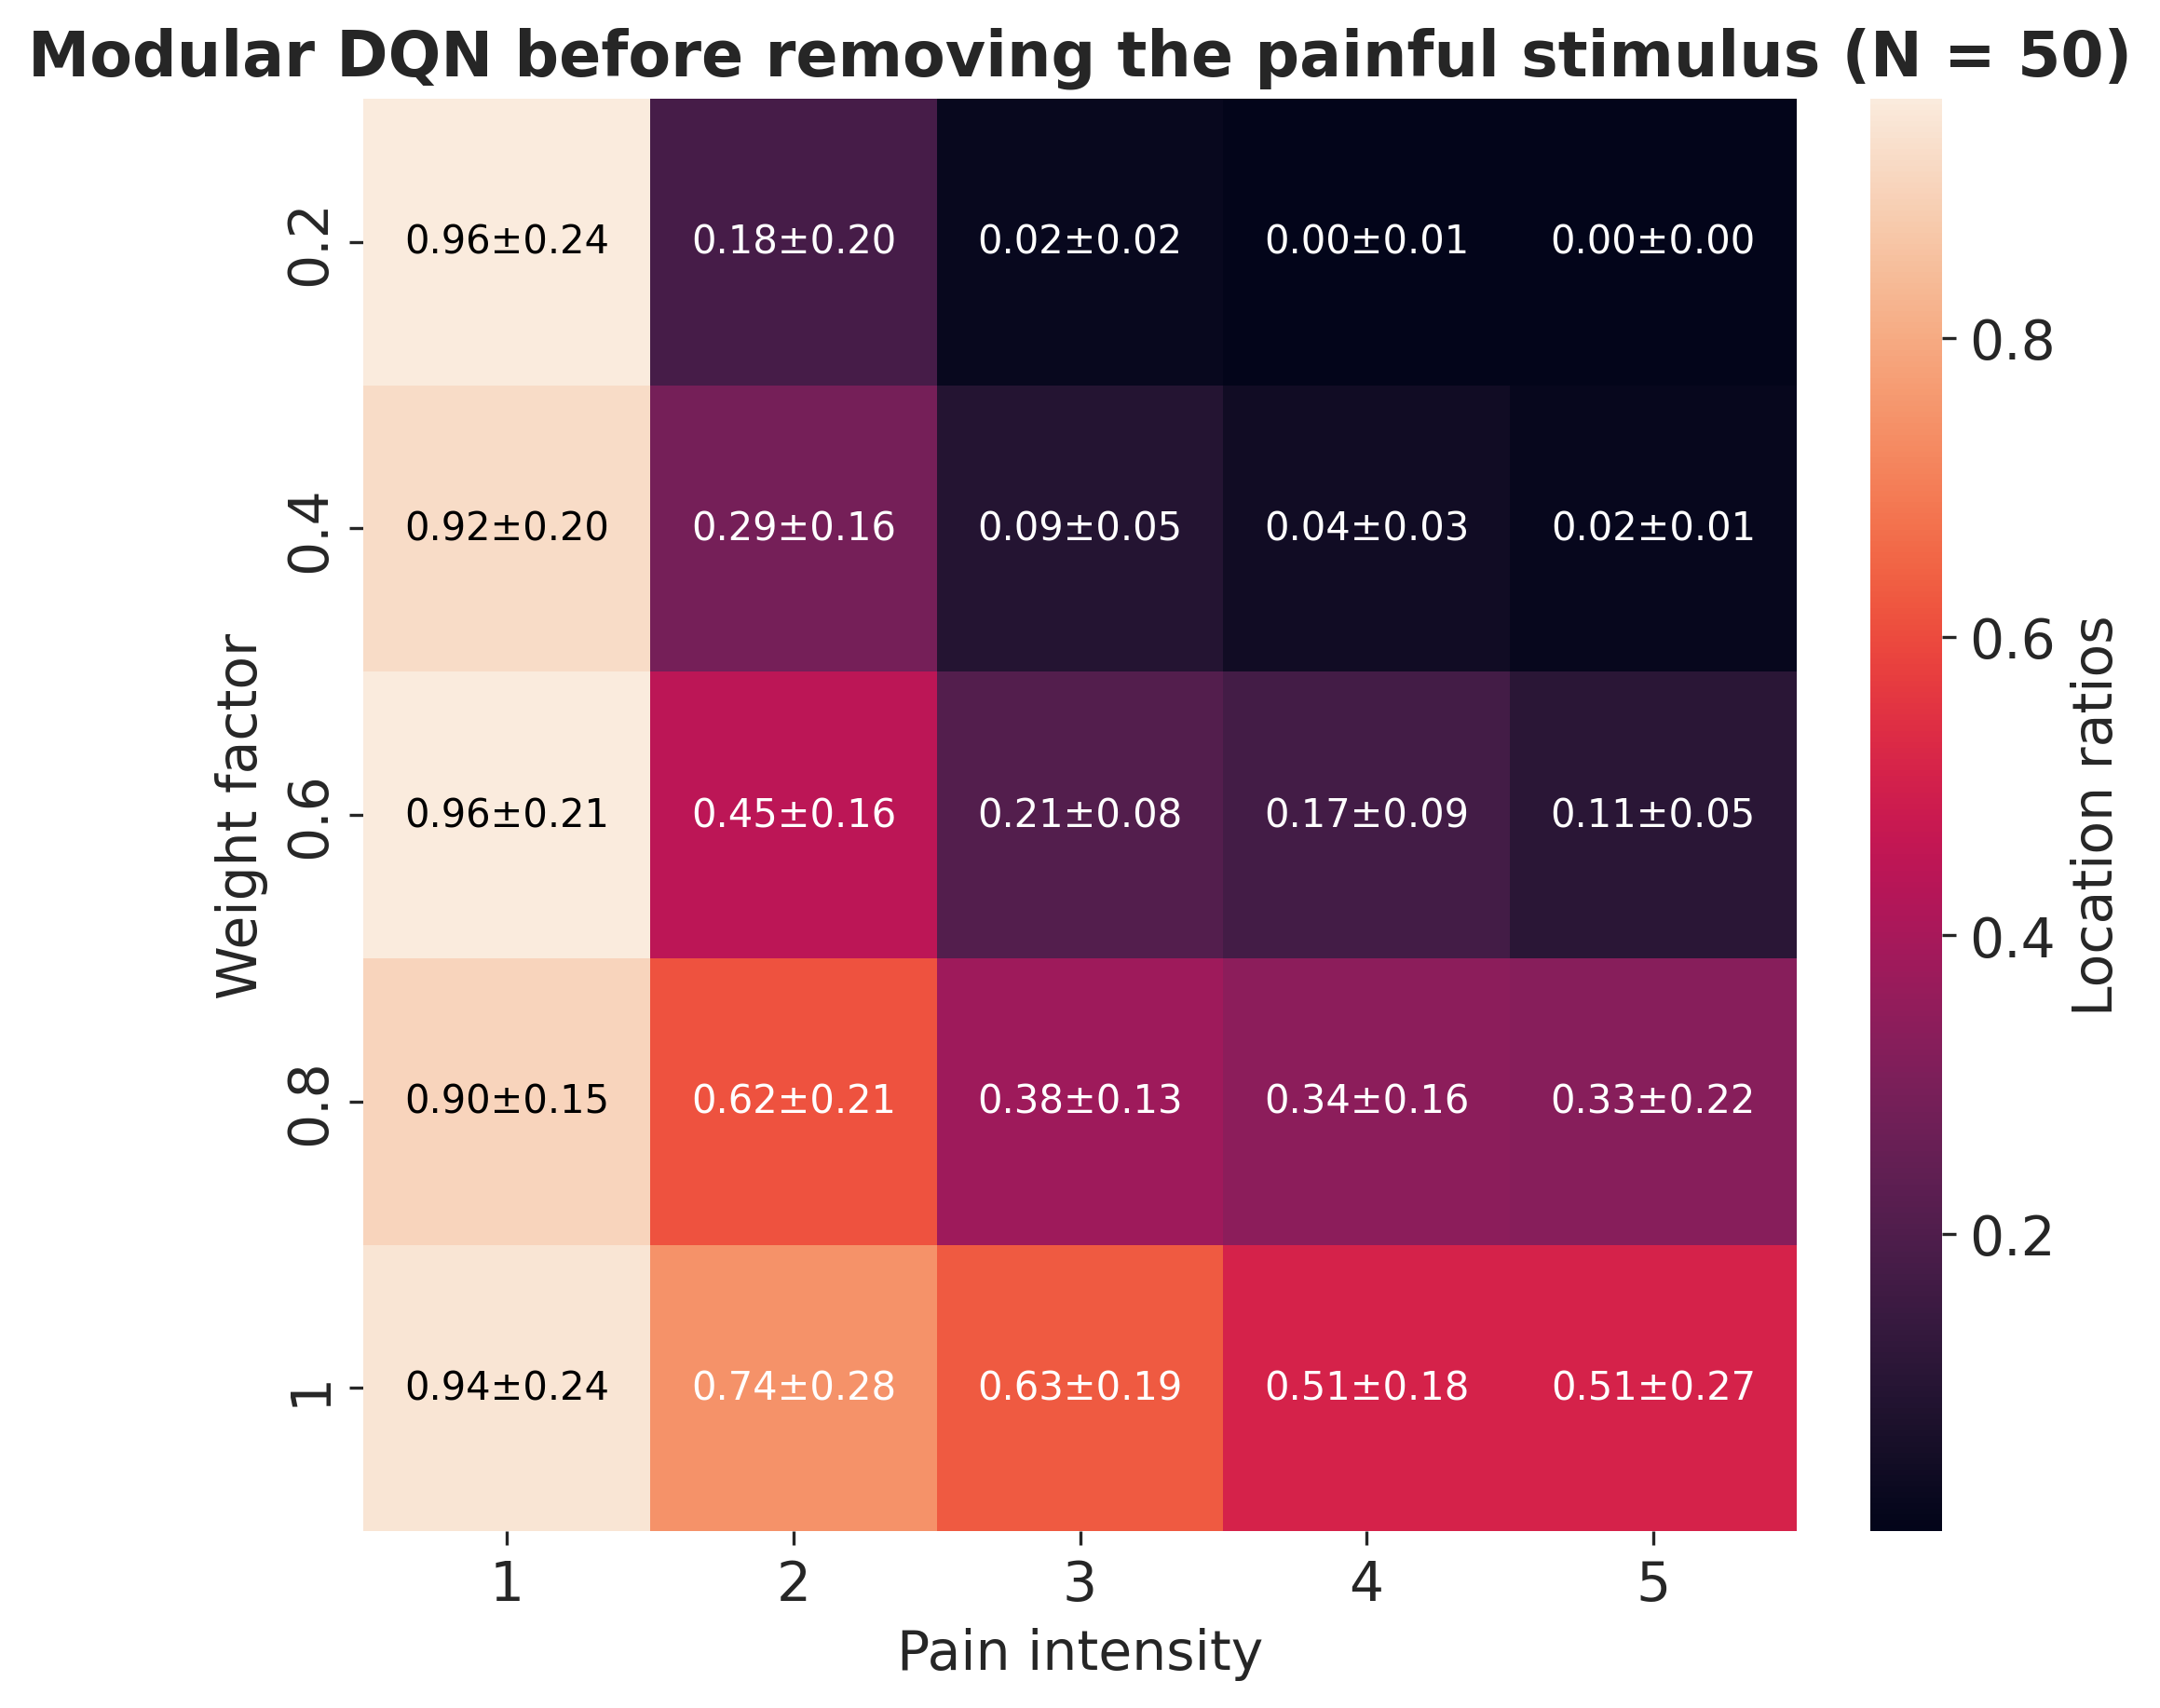

In [20]:
az.style.use("arviz-doc")
matrix = np.full((5, 5), np.nan, dtype=object)
w_list = [0.2, 0.4, 0.6, 0.8, 1.0]
pain_list = [1, 2, 3, 4, 5]
size = 50
plt.figure(figsize=(7, 6))

for j in range(len(pain_list)):
    for i in range(len(w_list)):
        ratio_list = []
        for batch in range(size):
            num_1 = 0
            num_2 = 0
            with open(f'../RL/outputs/dqn/mod_location_5e-05_w{w_list[i]}_pain{pain_list[j]}_{batch}.pkl', 'rb') as file:
                location = np.array(pickle.load(file))[25000:30000]
                for loc in location:
                    if loc[0] in (4, 5) and loc[1] in (5, 6, 7, 8):
                        num_1 += 1
                    if loc[0] in (4, 5) and loc[1] in (1, 2, 3, 4):
                        num_2 += 1
            ratio = num_2 / num_1
            ratio_list.append(ratio)
        
        avg = np.mean(ratio_list)
        std_dev = np.std(ratio_list)
        matrix[i, j] = (avg, std_dev)  # Store mean and std as a tuple

# Create a new matrix for the mean values to generate the heatmap
mean_matrix = np.array([[val[0] for val in row] for row in matrix])

# Generate the heatmap using only the mean values
heatmap = sns.heatmap(mean_matrix, annot=None, fmt=".2f", cbar_kws={'label': 'Location ratios'},
                      xticklabels=np.arange(1, 6, 1), yticklabels=[0.2, 0.4, 0.6, 0.8, 1],
                      annot_kws={'fontsize': 10}, square=True)

# Customize the annotations to show mean ± std and set text color based on mean value
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        mean_val = matrix[i, j][0]
        std_val = matrix[i, j][1]
        annotation = f"{mean_val:.2f}±{std_val:.2f}"
        
        # Set text color based on mean value
        text_color = "white" if mean_val < 0.9 else "black"
        
        heatmap.text(j + 0.5, i + 0.5, annotation,
                     ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel('Pain intensity')
plt.ylabel('Weight factor')
plt.title(f'Modular DQN before removing the painful stimulus (N = 50)')
plt.show()

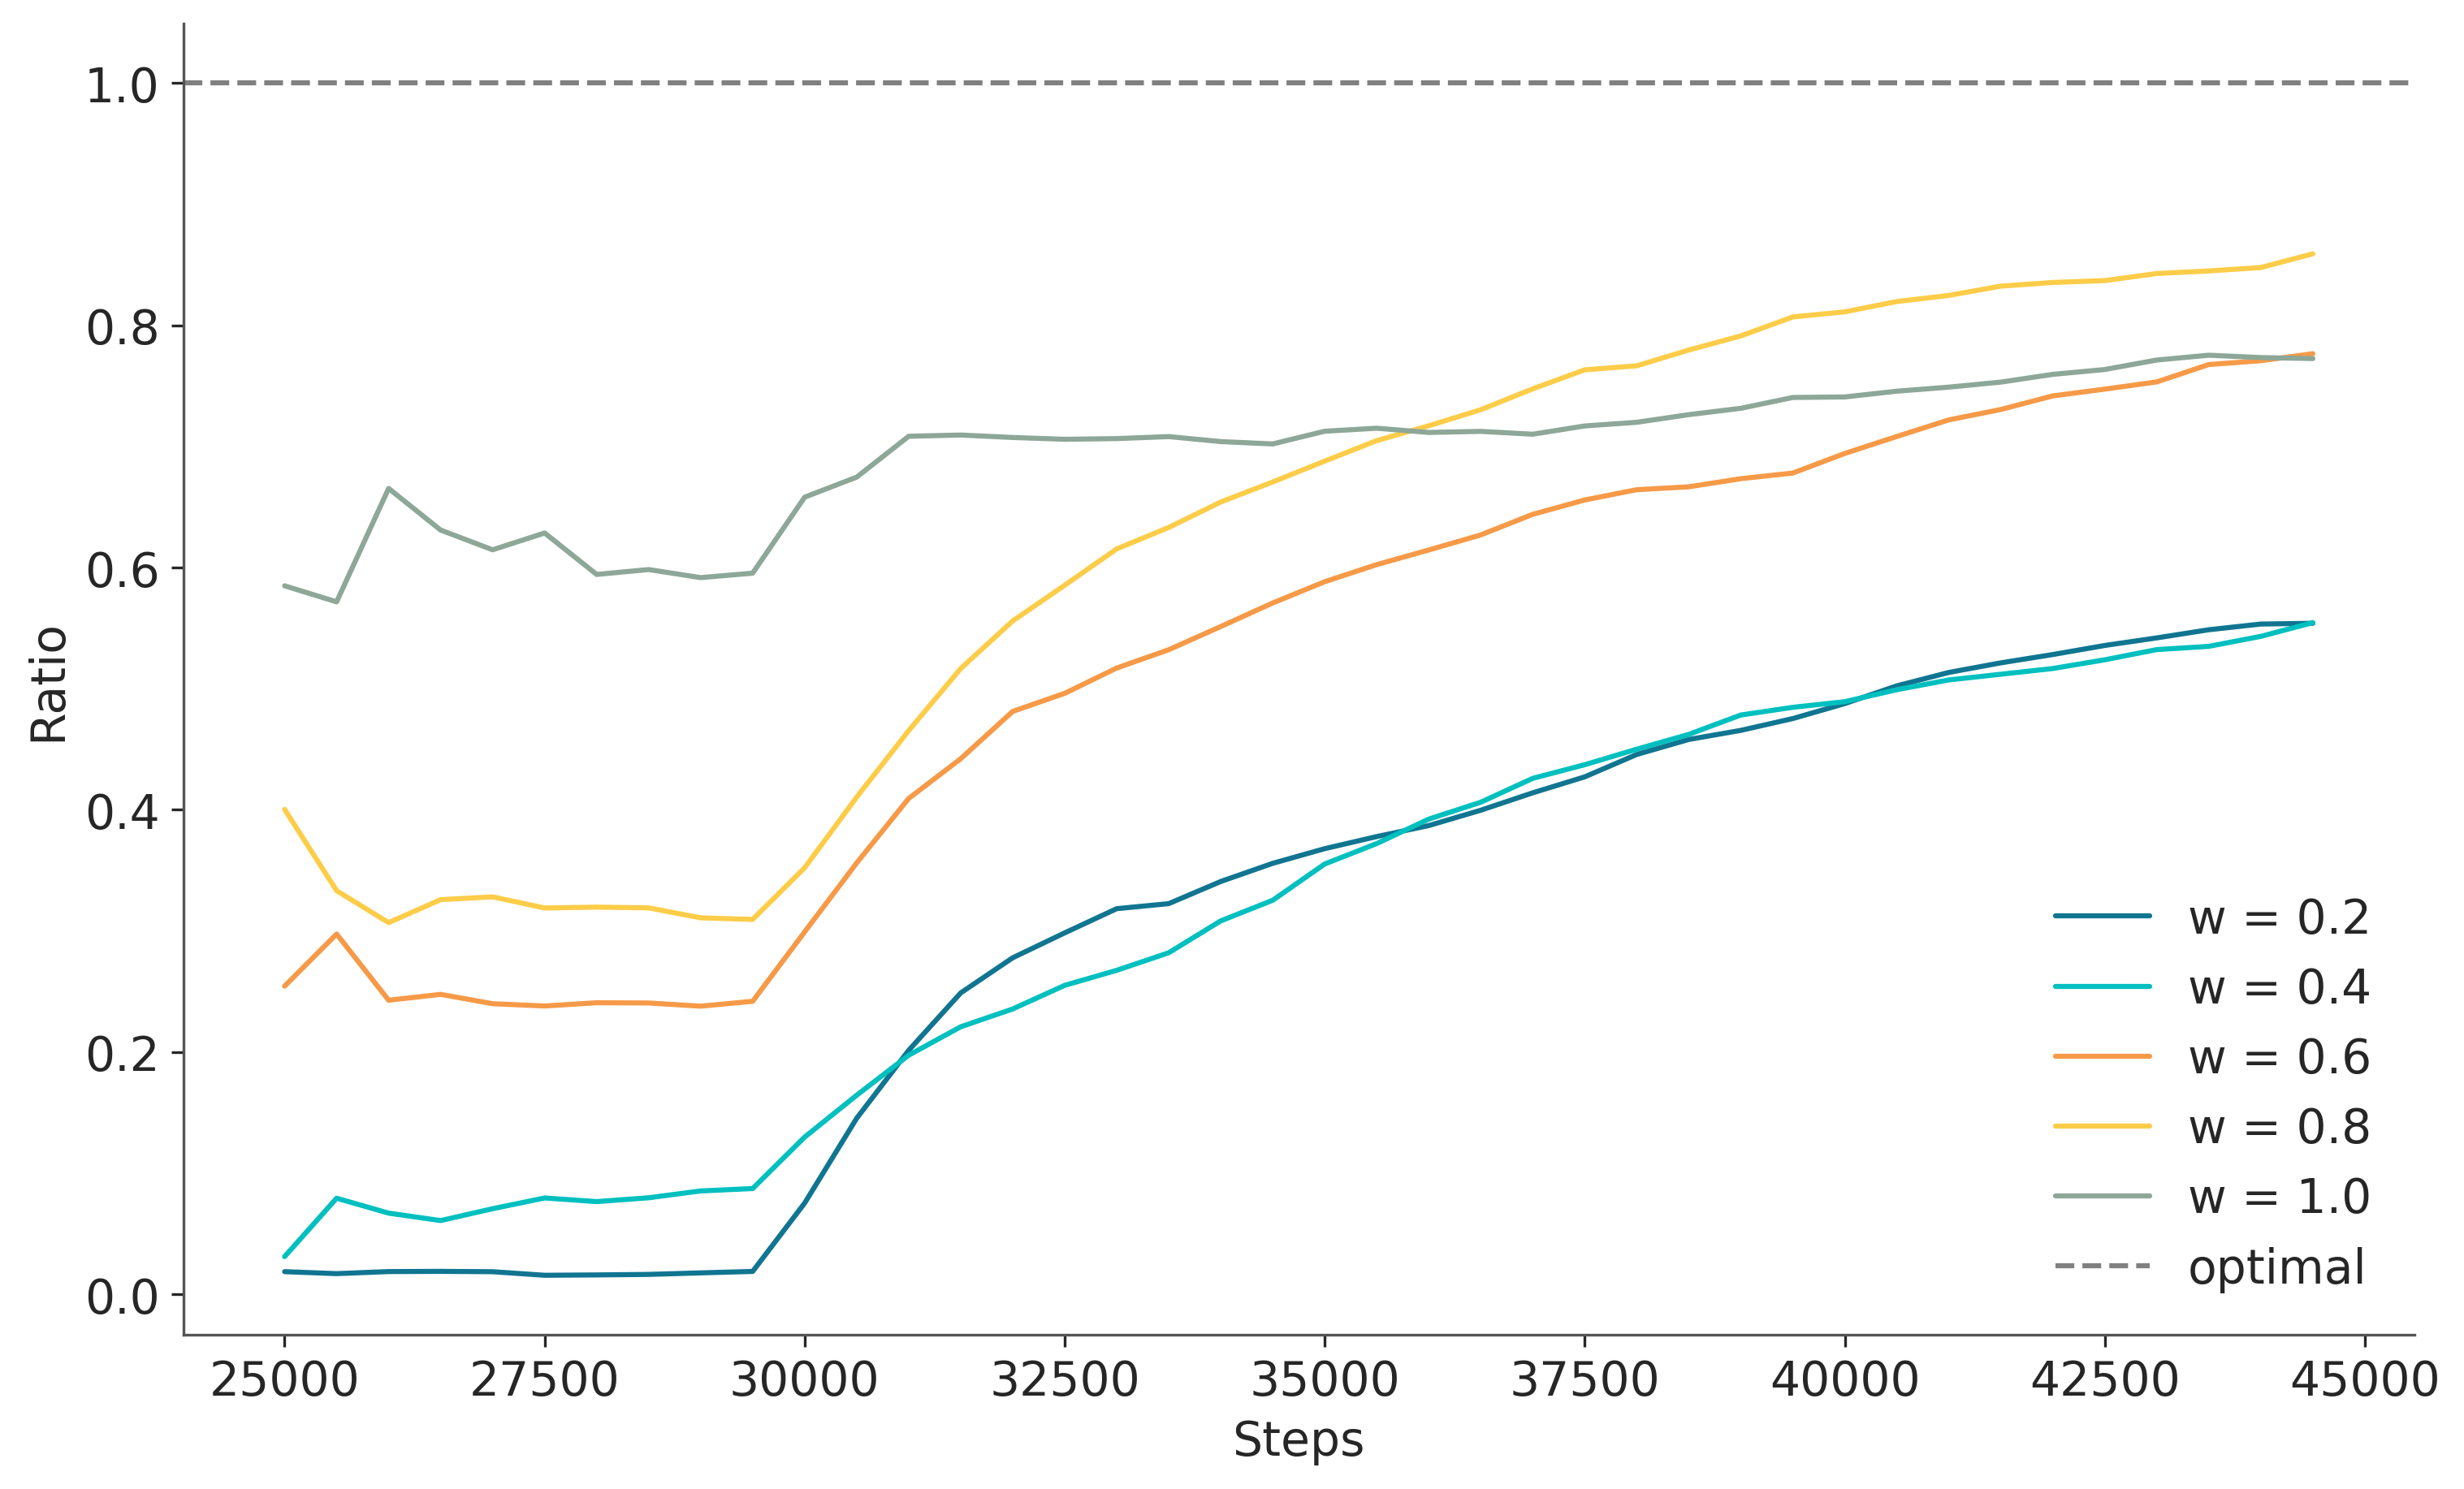

In [13]:
step_start = 25000
gap = 500
w_list = [0.2, 0.4, 0.6, 0.8, 1.0]
pain_list = [3]
size = 10
points = 40
plt.figure(figsize=(10, 6))

for j in range(len(pain_list)):
    for i in range(len(w_list)):
        ratio_list = []
        for point in range(points):
            tem = []
            for batch in range(size):
                num_1 = 0
                num_2 = 0
                with open(f'../RL/outputs/dqn/mod_location_5e-05_w{w_list[i]}_pain{pain_list[j]}_{batch}.pkl', 'rb') as file:
                    location = np.array(pickle.load(file))[step_start : step_start + gap * (point + 1)]
                    for loc in location:
                        if loc[0] in (4, 5) and loc[1] in (5, 6, 7, 8):
                            num_1 += 1
                        if loc[0] in (4, 5) and loc[1] in (1, 2, 3, 4):
                            num_2 += 1
                if num_1 == 0:
                    num_1 = 1
                    print(f'point{point}_w{w_list[i]}_pain{pain_list[j]}_{batch}')
                ratio = num_2/num_1
                tem.append(ratio)
            avg = np.mean(tem)
            ratio_list.append(avg)

        x_values = [step_start + gap * point for point in range(points)]
        plt.plot(x_values, ratio_list, label=f'w = {w_list[i]}')

plt.axhline(y=1, color='grey', linestyle='--', label='optimal')
plt.xlabel('Steps')
plt.ylabel('Ratio')
plt.legend()
plt.show()

## Deviation

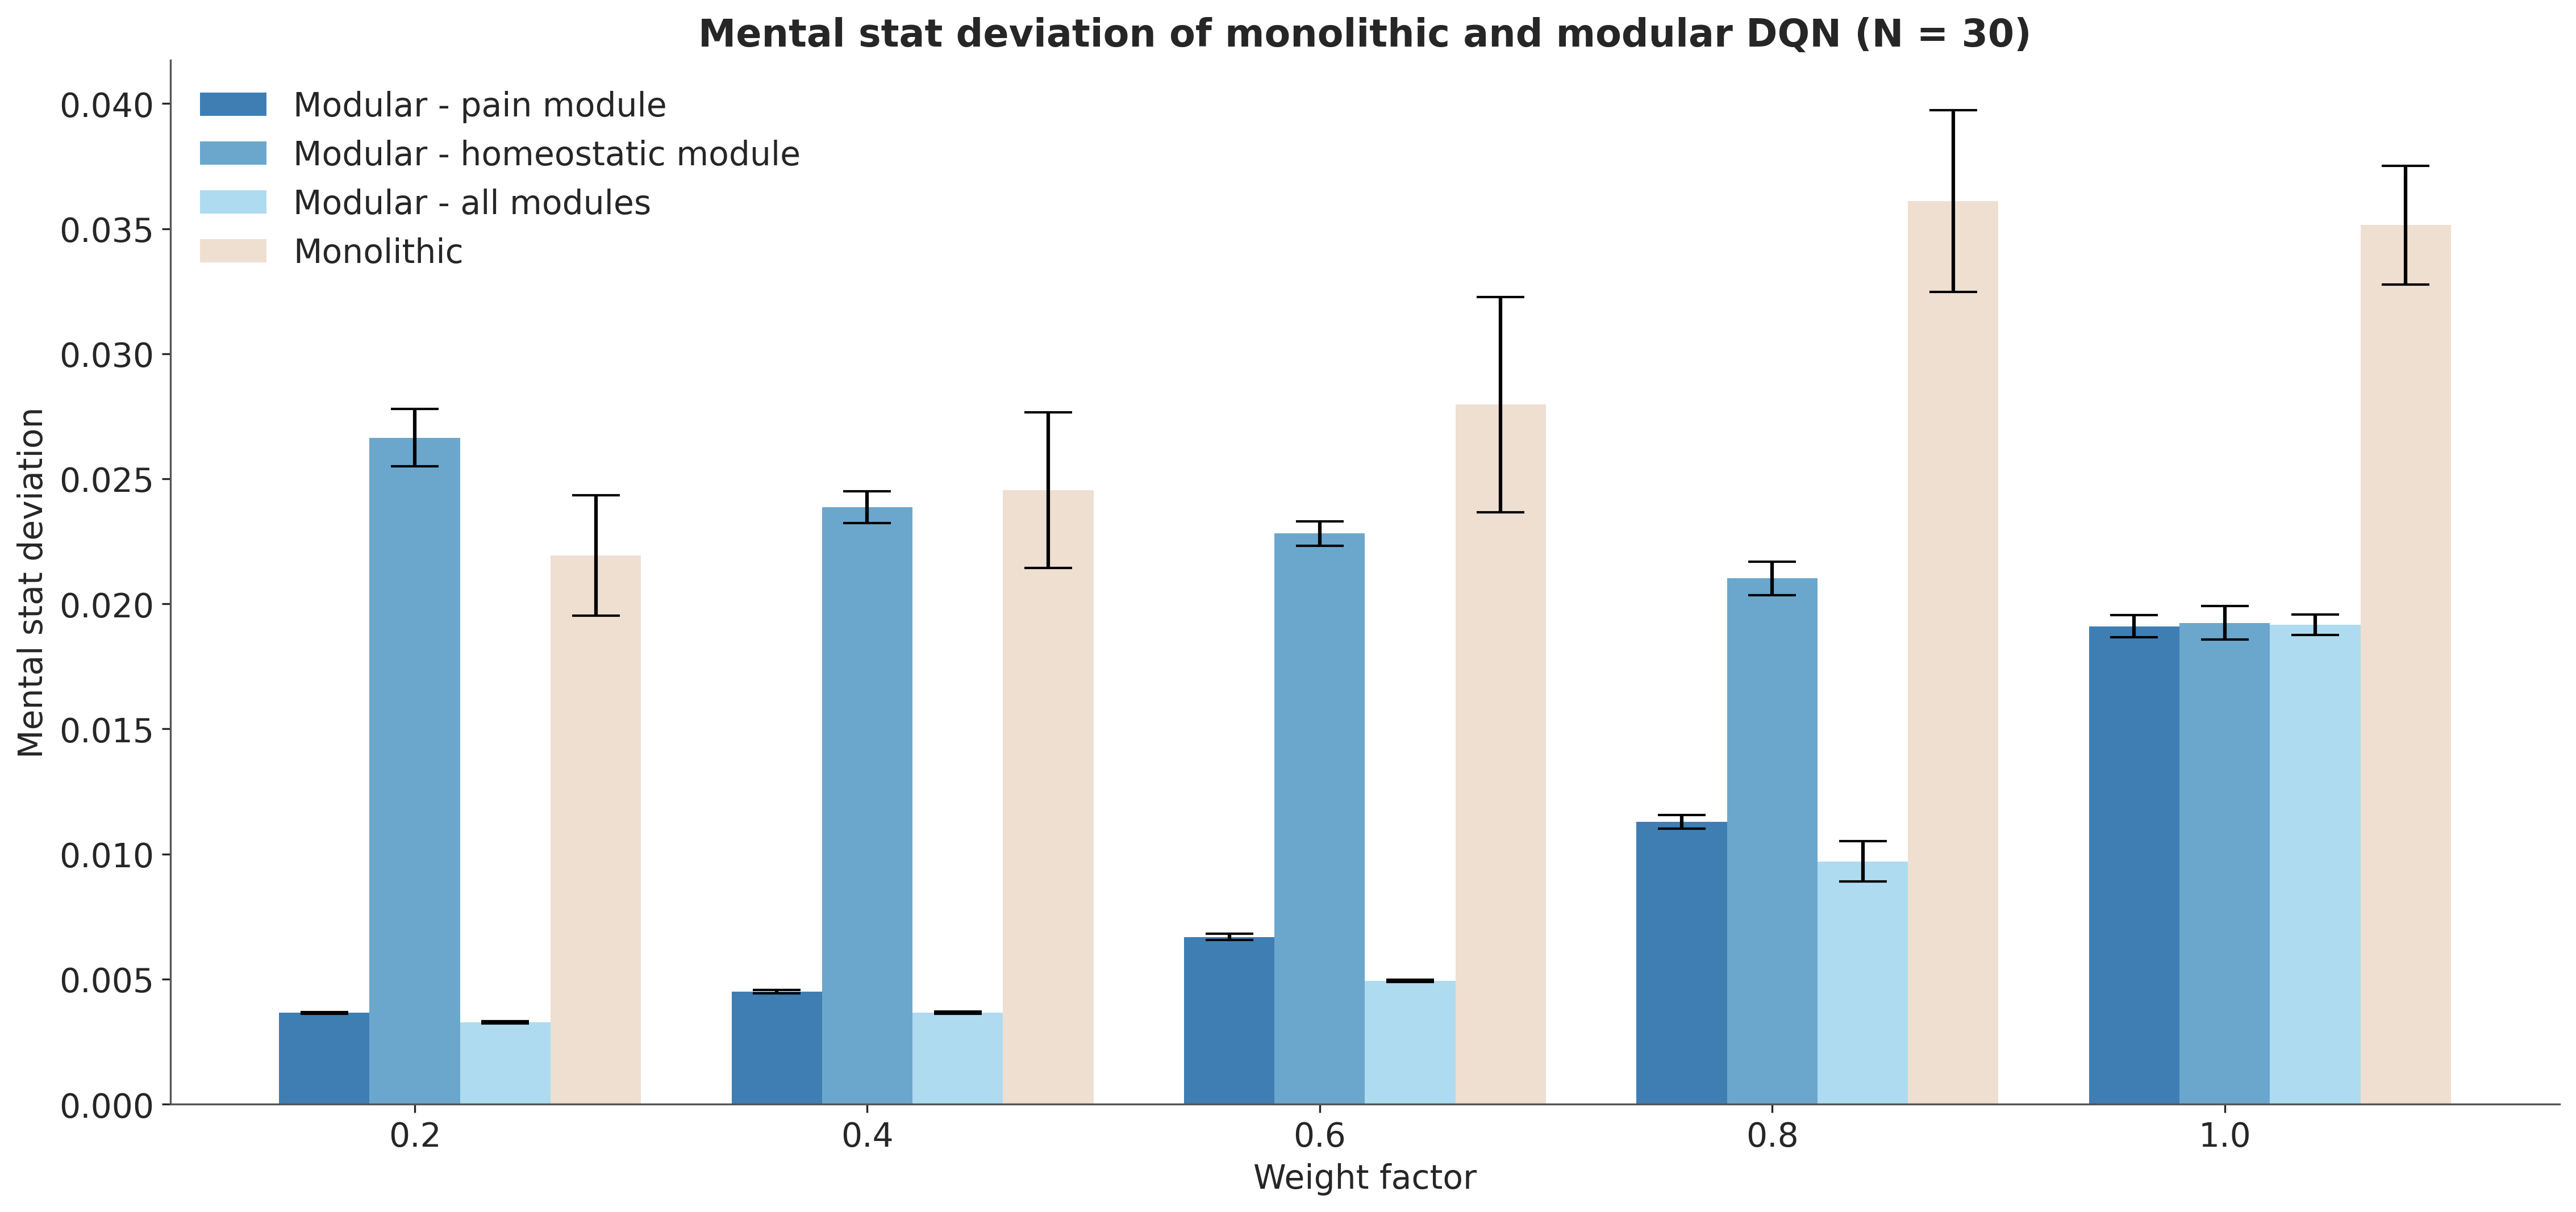

In [7]:
# Data
az.style.use("arviz-doc")
w_list = [0.2, 0.4, 0.6, 0.8, 1.0]
x_positions = np.arange(len(w_list)) * 3  # Adjust spacing between groups
bar_width = 0.6  # width of the bars
size = 30

plt.figure(figsize=(15, 7))

# First set of bars (original)
for i, pos in enumerate(x_positions):
    deviation_list = []
    for batch in range(size):
        with open(f'../RL/outputs/dqn/mod_mental_deviation_5e-05_w{w_list[i]}_{batch}.pkl', 'rb') as file:
            mental_deviation = pickle.load(file)
            deviation_list.append(mental_deviation)
    avg = np.mean(deviation_list)
    std = np.std(deviation_list, ddof=1)
    sem = std / np.sqrt(len(deviation_list))
    plt.bar(pos - bar_width, avg, width=bar_width, yerr=sem, capsize=10, color='#3F7EB3', label='Modular - pain module' if i == 0 else "")

# Second set of bars (new data)
for i, pos in enumerate(x_positions):
    deviation_list_2 = []
    for batch in range(size):
        with open(f'../RL/outputs/mod_homeo/mod_mental_deviation_5e-05_w{w_list[i]}_{batch}.pkl', 'rb') as file:
            mental_deviation = pickle.load(file)
            deviation_list_2.append(mental_deviation)
    avg_2 = np.mean(deviation_list_2)
    std_2 = np.std(deviation_list_2, ddof=1)
    sem_2 = std_2 / np.sqrt(len(deviation_list_2))
    plt.bar(pos, avg_2, width=bar_width, yerr=sem_2, capsize=10, color='#6BA7CC', label='Modular - homeostatic module' if i == 0 else "")

# Third set of bars (monolithic)
for i, pos in enumerate(x_positions):
    deviation_list_3 = []
    for batch in range(size):
        with open(f'../RL/outputs/mod_all/mod_mental_deviation_5e-05_w{w_list[i]}_{batch}.pkl', 'rb') as file:
            mental_deviation = pickle.load(file)
            deviation_list_3.append(mental_deviation)
    avg_3 = np.mean(deviation_list_3)
    std_3 = np.std(deviation_list_3, ddof=1)
    sem_3 = std_3 / np.sqrt(len(deviation_list_3))
    plt.bar(pos + bar_width, avg_3, width=bar_width, yerr=sem_3, capsize=10, color='#AEDBF0', label='Modular - all modules' if i == 0 else "")

# Third set of bars (monolithic)
for i, pos in enumerate(x_positions):
    deviation_list_4 = []
    for batch in range(size):
        with open(f'../RL/outputs/mon/mono_mental_deviation_5e-05_w{w_list[i]}_{batch}.pkl', 'rb') as file:
            mental_deviation = pickle.load(file)
            deviation_list_4.append(mental_deviation)
    avg_4 = np.mean(deviation_list_4)
    std_4 = np.std(deviation_list_4, ddof=1)
    sem_4 = std_4 / np.sqrt(len(deviation_list_4))
    plt.bar(pos + bar_width*2, avg_4, width=bar_width, yerr=sem_4, capsize=10, color='#EFDFD1', label='Monolithic' if i == 0 else "")

# Set x-ticks and labels after the loop
plt.xticks(x_positions, [f'{w}' for w in w_list])

plt.xlabel('Weight factor')
plt.ylabel('Mental stat deviation')
plt.title(f'Mental stat deviation of monolithic and modular DQN (N = {size})')
plt.legend()

# Show the plot
plt.show()

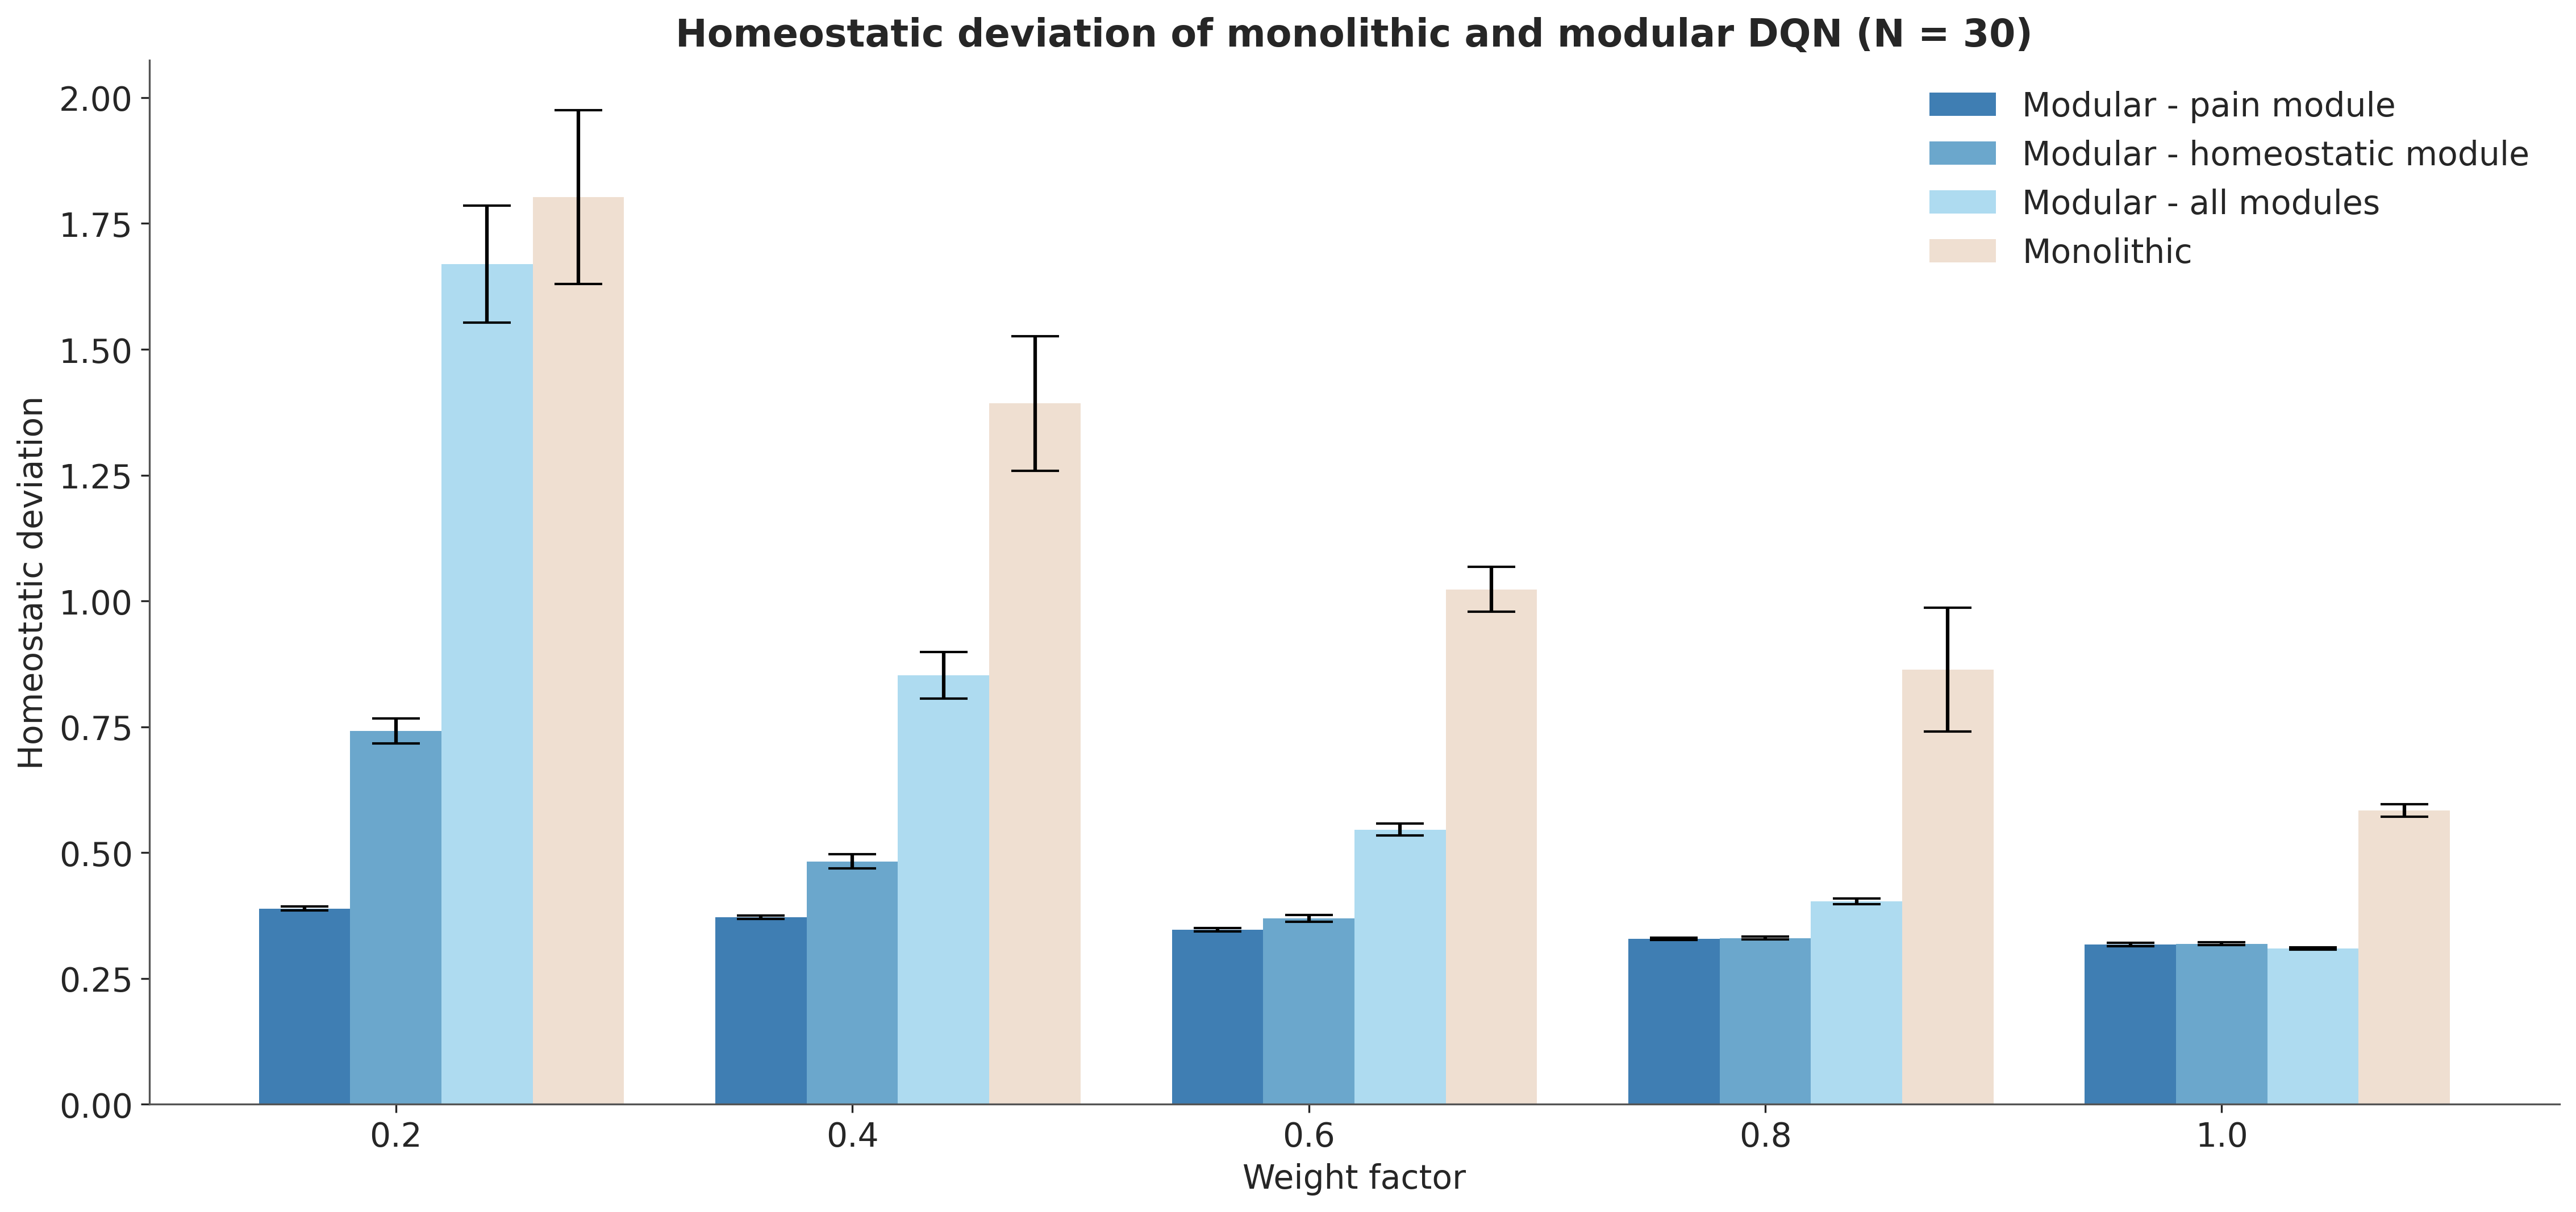

In [6]:
# Data
w_list = [0.2, 0.4, 0.6, 0.8, 1.0]
x_positions = np.arange(len(w_list)) * 3  # Adjust spacing between groups
bar_width = 0.6  # width of the bars
size = 30

plt.figure(figsize=(15, 7))

# First set of bars (original)
for i, pos in enumerate(x_positions):
    deviation_list = []
    for batch in range(size):
        with open(f'../RL/outputs/dqn/mod_stat_deviation_5e-05_w{w_list[i]}_{batch}.pkl', 'rb') as file:
            deviation = pickle.load(file)
            deviation_list.append(deviation/4)
    avg = np.mean(deviation_list)
    std = np.std(deviation_list, ddof=1)
    sem = std / np.sqrt(len(deviation_list))
    plt.bar(pos - bar_width, avg, width=bar_width, yerr=sem, capsize=10, color='#3F7EB3', label='Modular - pain module' if i == 0 else "")

# Second set of bars (new data)
for i, pos in enumerate(x_positions):
    deviation_list_2 = []
    for batch in range(size):
        with open(f'../RL/outputs/mod_homeo/mod_stat_deviation_5e-05_w{w_list[i]}_{batch}.pkl', 'rb') as file:
            deviation = pickle.load(file)
            deviation_list_2.append(deviation/4)
    avg_2 = np.mean(deviation_list_2)
    std_2 = np.std(deviation_list_2, ddof=1)
    sem_2 = std_2 / np.sqrt(len(deviation_list_2))
    plt.bar(pos, avg_2, width=bar_width, yerr=sem_2, capsize=10, color='#6BA7CC', label='Modular - homeostatic module' if i == 0 else "")

# Third set of bars (new data)
for i, pos in enumerate(x_positions):
    deviation_list_3 = []
    for batch in range(size):
        with open(f'../RL/outputs/mod_all/mod_stat_deviation_5e-05_w{w_list[i]}_{batch}.pkl', 'rb') as file:
            deviation = pickle.load(file)
            deviation_list_3.append(deviation/4)
    avg_3 = np.mean(deviation_list_3)
    std_3 = np.std(deviation_list_3, ddof=1)
    sem_3 = std_3 / np.sqrt(len(deviation_list_3))
    plt.bar(pos + bar_width, avg_3, width=bar_width, yerr=sem_3, capsize=10, color='#AEDBF0', label='Modular - all modules' if i == 0 else "")

# Third set of bars (new data)
for i, pos in enumerate(x_positions):
    deviation_list_3 = []
    for batch in range(size):
        with open(f'../RL/outputs/mon/mono_stat_deviation_5e-05_w{w_list[i]}_{batch}.pkl', 'rb') as file:
            deviation = pickle.load(file)
            deviation_list_3.append(deviation/4)
    avg_3 = np.mean(deviation_list_3)
    std_3 = np.std(deviation_list_3, ddof=1)
    sem_3 = std_3 / np.sqrt(len(deviation_list_3))
    plt.bar(pos + bar_width*2, avg_3, width=bar_width, yerr=sem_3, capsize=10, color='#EFDFD1', label='Monolithic' if i == 0 else "")

# Set x-ticks and labels after the loop
plt.xticks(x_positions, [f'{w}' for w in w_list])

plt.xlabel('Weight factor')
plt.ylabel('Homeostatic deviation')
plt.title(f'Homeostatic deviation of monolithic and modular DQN (N = {size})')
plt.legend()

# Show the plot
plt.show()

# PPO

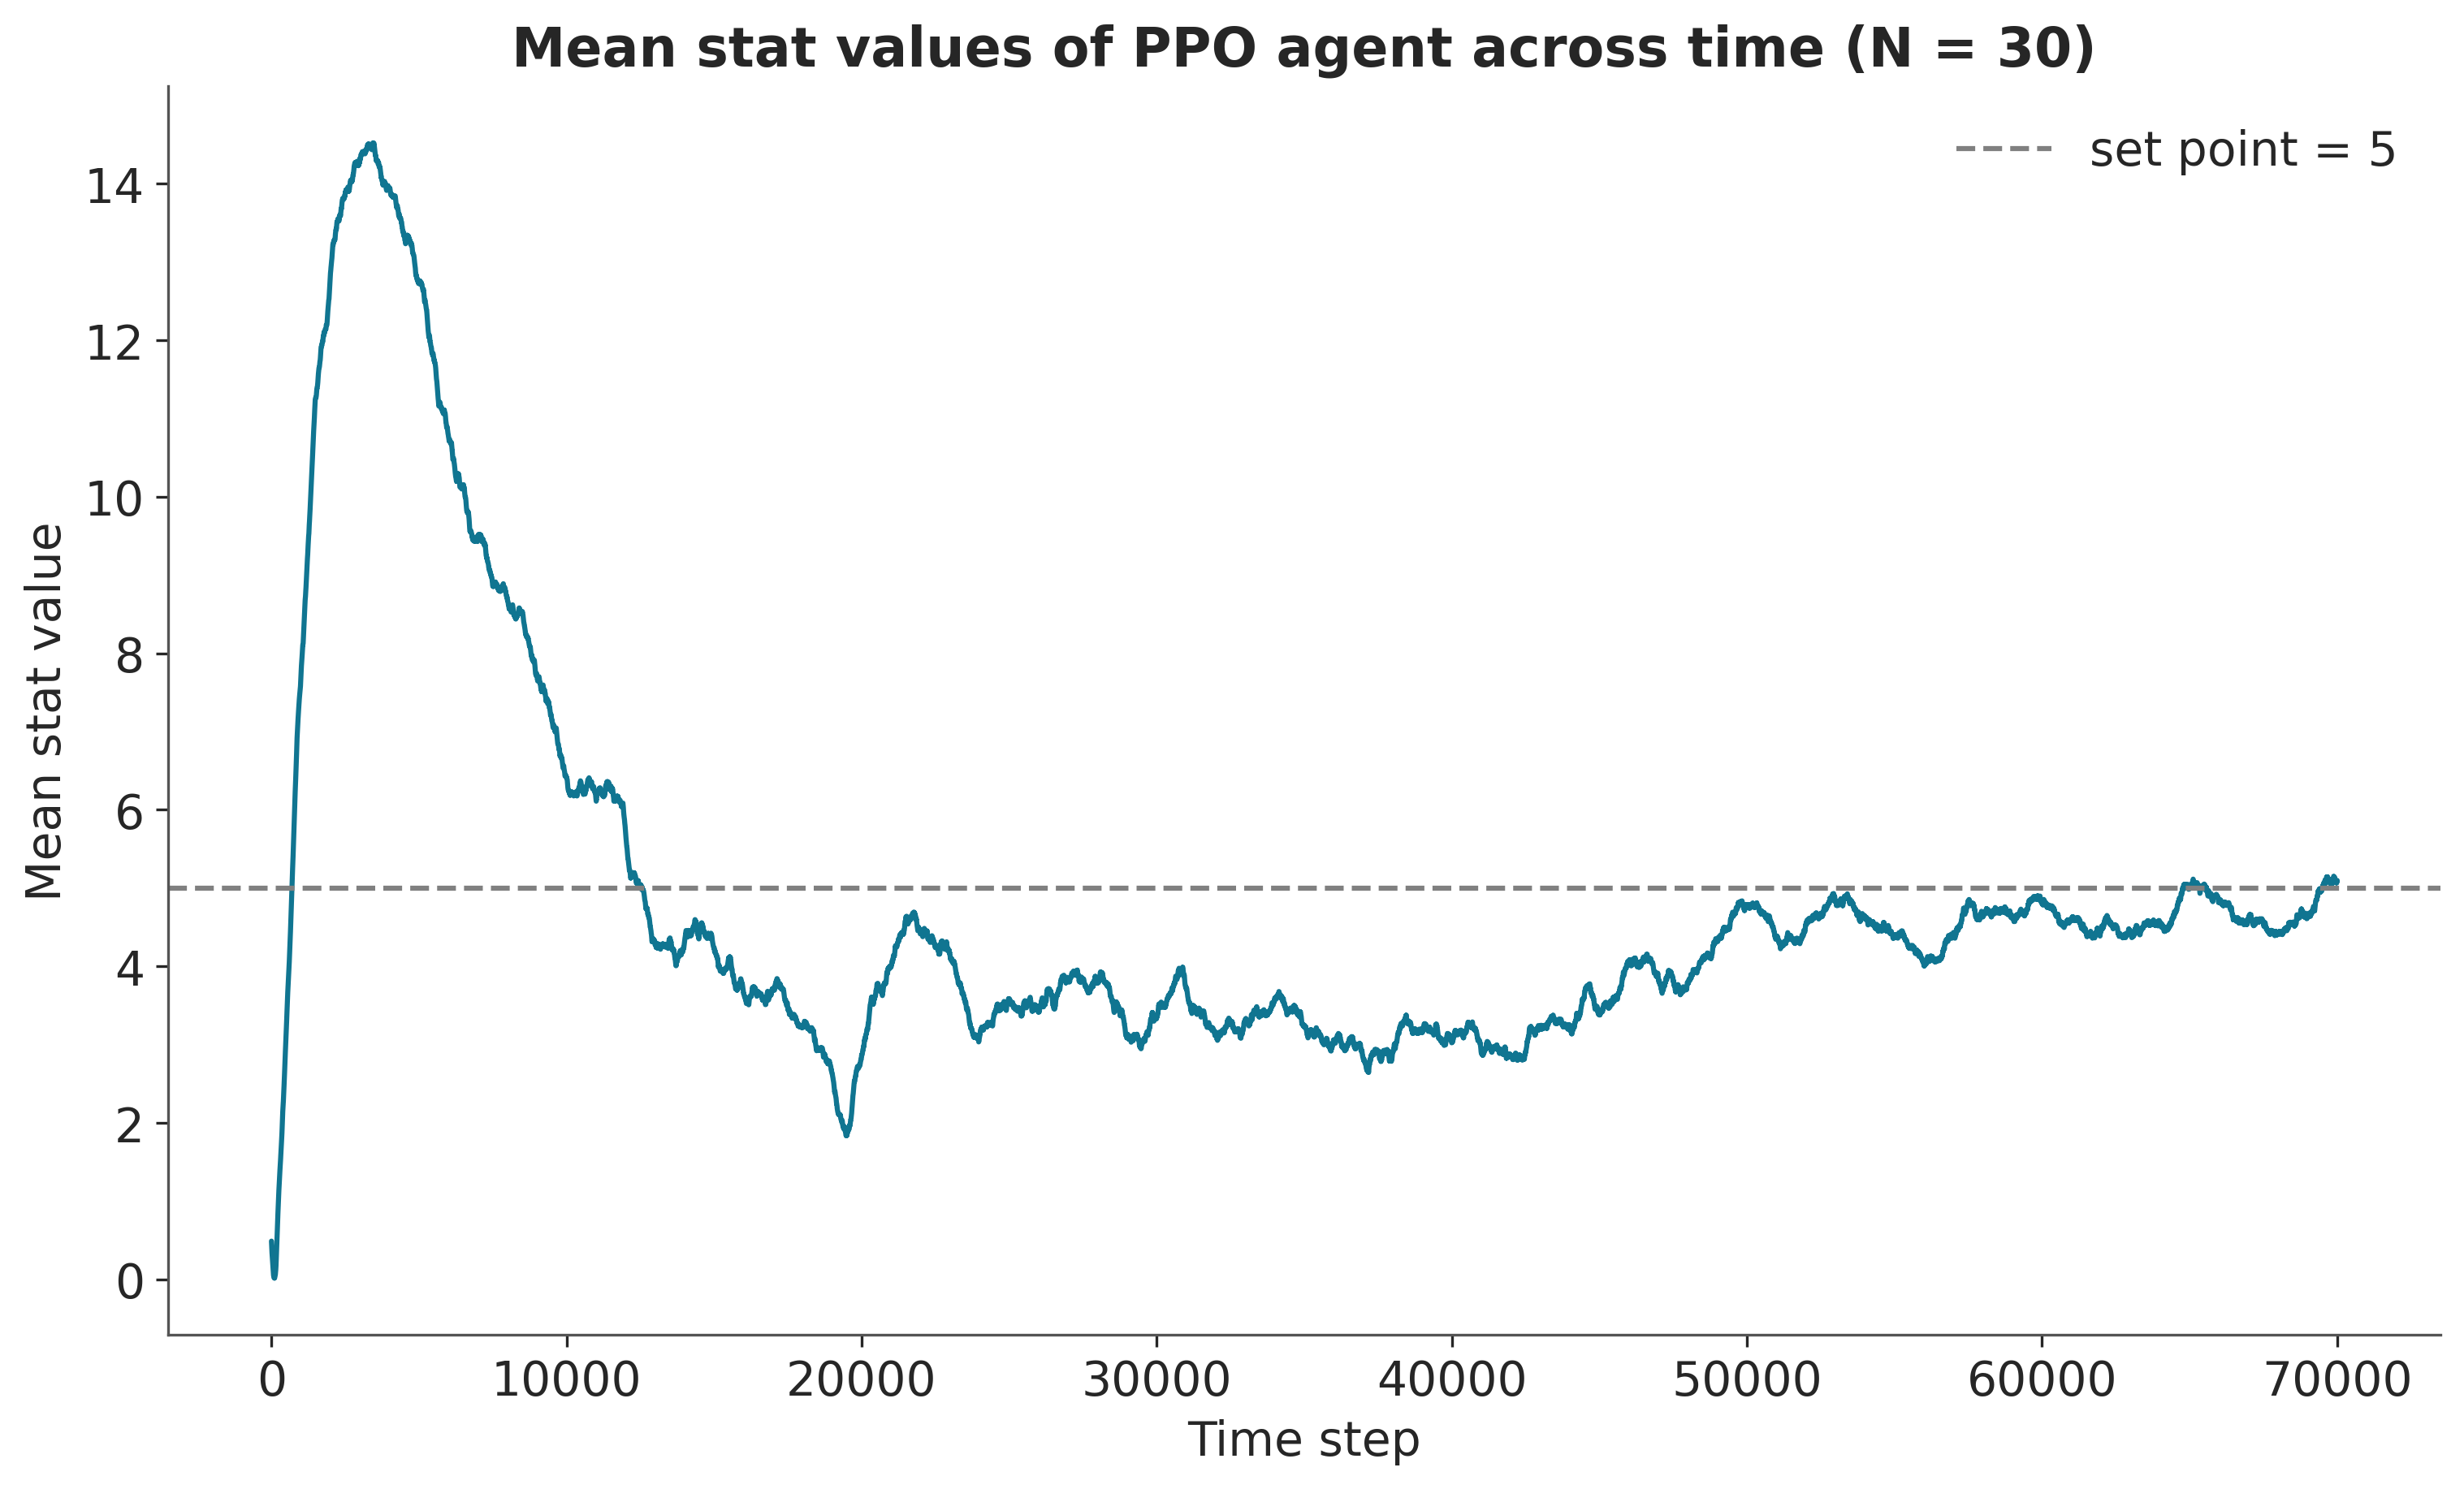

In [33]:
az.style.use("arviz-doc")
plt.figure(figsize=(10, 6))

stats = []
for batch in range(30):
    with open(f'../RL/outputs/ppo/ppo_stats_{batch}.pkl', 'rb') as file:
        stats_list = np.array(pickle.load(file))
    stats.append(stats_list)
stats = np.array(stats) # shape: (10, 15000, 4)
avg_stats = np.mean(stats, axis=0)
avg_stats = np.mean(avg_stats, axis=1)
plt.plot(avg_stats)

plt.axhline(y=5, color='grey', linestyle='--', label='set point = 5')
plt.xlabel('Time step')
plt.ylabel('Mean stat value')
plt.title('Mean stat values of PPO agent across time (N = 30)')
plt.legend(loc='best')
plt.show()